Set some test folders with VASP output files for execution in the notebook!

In [1]:
ref_paths = {
    "tight relax 1_mp-117_0.94_pre1": "tutorial_data/tight_relax_1_mp-117_0.94_0_42",
    "tight relax 1_mp-117_0.94_0": "tutorial_data/tight_relax_1_mp-117_0.94_0_42",
    "tight relax 1_mp-117_0.94_1": "tutorial_data/tight_relax_1_mp-117_0.94_0_42",
    "dft tight relax 1_mp-117_0.94_0": "tutorial_data/tight_relax_1_mp-117_0.94_0_42",
    "tight relax 2_mp-117_0.94_pre1": "tutorial_data/tight_relax_2_mp-117_0.94_0_43",
    "tight relax 2_mp-117_0.94_0": "tutorial_data/tight_relax_2_mp-117_0.94_0_43",
    "tight relax 2_mp-117_0.94_1": "tutorial_data/tight_relax_2_mp-117_0.94_0_43",
    "dft tight relax 2_mp-117_0.94_0": "tutorial_data/tight_relax_2_mp-117_0.94_0_43",
    "dft static_mp-117_0.94_0": "tutorial_data/tight_relax_2_mp-117_0.94_0_43",
    "tight relax 1_mp-117_1.0_pre1": "tutorial_data/tight_relax_1_mp-117_1.0_0_47",
    "tight relax 1_mp-117_1.0_0": "tutorial_data/tight_relax_1_mp-117_1.0_0_47",
    "tight relax 1_mp-117_1.0_1": "tutorial_data/tight_relax_1_mp-117_1.0_0_47",
    "dft tight relax 1_mp-117_1.0_0": "tutorial_data/tight_relax_1_mp-117_1.0_0_47",
    "dft tight relax 1_mp-117_1.0_1": "tutorial_data/tight_relax_1_mp-117_1.0_0_47",
    "tight relax 2_mp-117_1.0_pre1": "tutorial_data/tight_relax_2_mp-117_1.0_0_48",
    "tight relax 2_mp-117_1.0_0": "tutorial_data/tight_relax_2_mp-117_1.0_0_48",
    "tight relax 2_mp-117_1.0_1": "tutorial_data/tight_relax_2_mp-117_1.0_0_48",
    "dft tight relax 2_mp-117_1.0_0": "tutorial_data/tight_relax_2_mp-117_1.0_0_48",
    "dft tight relax 2_mp-117_1.0_1": "tutorial_data/tight_relax_2_mp-117_1.0_0_48",
    "dft static_mp-117_1.0_0": "tutorial_data/tight_relax_2_mp-117_1.0_0_48",
    "tight relax 1_mp-117_1.06_pre1": "tutorial_data/tight_relax_1_mp-117_1.06_0_52",
    "tight relax 1_mp-117_1.06_0": "tutorial_data/tight_relax_1_mp-117_1.06_0_52",
    "tight relax 1_mp-117_1.06_1": "tutorial_data/tight_relax_1_mp-117_1.06_0_52",
    "dft tight relax 1_mp-117_1.06_0": "tutorial_data/tight_relax_1_mp-117_1.06_0_52",
    "dft tight relax 1_mp-117_1.06_1": "tutorial_data/tight_relax_1_mp-117_1.06_0_52",
    "tight relax 2_mp-117_1.06_pre1": "tutorial_data/tight_relax_2_mp-117_1.06_0_53",
    "tight relax 2_mp-117_1.06_0": "tutorial_data/tight_relax_2_mp-117_1.06_0_53",
    "tight relax 2_mp-117_1.06_1": "tutorial_data/tight_relax_2_mp-117_1.06_0_53",
    "dft tight relax 2_mp-117_1.06_0": "tutorial_data/tight_relax_2_mp-117_1.06_0_53",
    "dft static_mp-117_1.06_0": "tutorial_data/tight_relax_2_mp-117_1.06_0_53",
    "Sn-stat_iso_atom_0": "tutorial_data/Sn-stat_iso_atom_0_25",
    "Sn-stat_iso_atom_1": "tutorial_data/Sn-stat_iso_atom_0_25",
    "dft rattle static 1/1_mp-117_0.94_0": "tutorial_data/dft_rattle_static_1_1_mp-117_0.94_0_63",
    "dft rattle static 1/1_mp-117_0.94_1": "tutorial_data/dft_rattle_static_1_1_mp-117_0.94_1_257",
    "dft rattle static 1/1_mp-117_1.0_0": "tutorial_data/dft_rattle_static_1_1_mp-117_1.0_0_65",
    "dft rattle static 1/1_mp-117_1.0_1": "tutorial_data/dft_rattle_static_1_1_mp-117_1.0_1_255",
    "dft rattle static 1/1_mp-117_1.06_0": "tutorial_data/dft_rattle_static_1_1_mp-117_1.06_0_67",
    "dft rattle static 1/1_mp-117_1.06_1": "tutorial_data/dft_rattle_static_1_1_mp-117_1.06_1_259",
    "dft phonon static 1/1_mp-117_0.94_0": "tutorial_data/dft_phonon_static_1_1_mp-117_0.94_0_193",
    "dft phonon static 1/1_mp-117_1.0_0": "tutorial_data/dft_phonon_static_1_1_mp-117_1.0_0_189",
    "dft phonon static 1/1_mp-117_1.06_0": "tutorial_data/dft_phonon_static_1_1_mp-117_1.06_0_191",
}

In [2]:
from atomate2.vasp.flows.core import DoubleRelaxMaker
from atomate2.vasp.jobs.core import StaticMaker, TightRelaxMaker
from atomate2.vasp.jobs.phonons import PhononDisplacementMaker
from atomate2.vasp.sets.core import StaticSetGenerator, TightRelaxSetGenerator
from autoplex.auto.phonons.flows import (
    CompleteDFTvsMLBenchmarkWorkflow,
    IterativeCompleteDFTvsMLBenchmarkWorkflow,
)
from jobflow import run_locally, Flow
from pymatgen.core.structure import Structure

from mock_vasp import TEST_DIR, mock_vasp

/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/nequip/__init__.py:20: UserWarning: !! PyTorch version 2.2.1+cu121 found. Upstream issues in PyTorch versions 1.13.* and 2.* have been seen to cause unusual performance degredations on some CUDA systems that become worse over time; see https://github.com/mir-group/nequip/discussions/311. The best tested PyTorch version to use with CUDA devices is 1.11; while using other versions if you observe this problem, an unexpected lack of this problem, or other strange behavior, please post in the linked GitHub issue.
  warnings.warn(


First, we define all relevant Makers for the workflow, used to train and finetune ML potentials for phonons. We need one for the relaxation in advance of the workflow and te later relaxations.

In [3]:
phonon_bulk_relax_maker = DoubleRelaxMaker.from_relax_maker(
    TightRelaxMaker(
        run_vasp_kwargs={"handlers": ()},
        input_set_generator=TightRelaxSetGenerator(
            user_incar_settings={
                "GGA": "PE",
                "ISPIN": 1,
                "KSPACING": 0.1,
                "ALGO": "Normal",
                "LAECHG": False,
                "ISMEAR": 1,
                "ENCUT": 700,
                "IBRION": 1,
                "ISYM": 0,
                "SIGMA": 0.05,
                "LCHARG": False,
                "LWAVE": False,
                "LVTOT": False,
                "LORBIT": None,
                "LOPTICS": False,
                "LREAL": False,
                "ISIF": 4,
                "NPAR": 4,
            }
        ),
    )
)

In [4]:
phonon_displacement_maker = PhononDisplacementMaker(
    name="dft phonon static",
    run_vasp_kwargs={"handlers": ()},
    input_set_generator=StaticSetGenerator(
        user_incar_settings={
            "GGA": "PE",
            "IBRION": -1,
            "ISPIN": 1,
            "ISMEAR": 1,
            "ISIF": 3,
            "ENCUT": 700,
            "EDIFF": 1e-7,
            "LAECHG": False,
            "LREAL": False,
            "ALGO": "Normal",
            "NSW": 0,
            "LCHARG": False,
            "LWAVE": False,
            "LVTOT": False,
            "LORBIT": None,
            "LOPTICS": False,
            "SIGMA": 0.05,
            "ISYM": 0,
            "KSPACING": 0.1,
            "NPAR": 4,
        },
        auto_ispin=False,
    ),
)

In [5]:
phonon_static_energy_maker = phonon_displacement_maker

static_isolated_atom_maker = StaticMaker(
    run_vasp_kwargs={"handlers": ()},
    input_set_generator=StaticSetGenerator(
        user_kpoints_settings={"reciprocal_density": 1},
        user_incar_settings={
            "GGA": "PE",
            "ALGO": "Normal",
            "ISPIN": 1,
            "LAECHG": False,
            "ISMEAR": 0,
            "LCHARG": False,
            "LWAVE": False,
            "LVTOT": False,
            "LORBIT": None,
            "LOPTICS": False,
            "NPAR": 4,
        },
    ),
)

First, collect a number of structures and then optimize them in advance of the workflow. One can also perform subsequent optimizations with different k-point settings, for example.

In [6]:
job_list = []


structure_list = []
benchmark_structure_list = []
start_mpids = ["mp-117"]
start_poscar = [TEST_DIR / "tutorial_data/POSCAR-mp-117"]

mpids = []
for mpid, start_poscar in zip(start_mpids, start_poscar):
    for scale in [0.94, 1.0, 1.06]:
        structure = Structure.from_file(start_poscar)
        volume = structure.copy().volume
        structure = structure.scale_lattice((scale**3) * volume)  # added the cube
        job_opt = phonon_bulk_relax_maker.make(structure)
        job_opt.append_name("_" + mpid + "_" + str(scale) + "_pre1")
        job_list.append(job_opt)
        structure_list.append(job_opt.output.structure)
        mpids.append(mpid + "_" + str(scale))


mpbenchmark = mpids
benchmark_structure_list = structure_list

In [7]:
iteration_flow = IterativeCompleteDFTvsMLBenchmarkWorkflow(
    max_iterations=2,
    rms_max=0.2,
    complete_dft_vs_ml_benchmark_workflow_0=CompleteDFTvsMLBenchmarkWorkflow(
        symprec=1e-3,
        apply_data_preprocessing=True,
        add_dft_rattled_struct=True,
        add_dft_phonon_struct=True,
        volume_custom_scale_factors=[1.0],
        rattle_type=0,
        distort_type=0,
        rattle_std=0.1,  #
        benchmark_kwargs={"relax_maker_kwargs": {"relax_cell": False}},
        supercell_settings={
            "min_length": 10,
            "max_length": 15,
            "min_atoms": 10,
            "max_atoms": 300,
            "fallback_min_length": 9,
        },
        # settings that worked with a GAP
        split_ratio=0.33,
        regularization=False,
        separated=False,
        num_processes_fit=48,
        displacement_maker=phonon_displacement_maker,
        phonon_bulk_relax_maker=phonon_bulk_relax_maker,
        phonon_static_energy_maker=phonon_static_energy_maker,
        rattled_bulk_relax_maker=phonon_bulk_relax_maker,
        isolated_atom_maker=static_isolated_atom_maker,
    ),
    complete_dft_vs_ml_benchmark_workflow_1=CompleteDFTvsMLBenchmarkWorkflow(
        symprec=1e-3,
        apply_data_preprocessing=True,
        add_dft_phonon_struct=False,
        add_dft_rattled_struct=True,
        volume_custom_scale_factors=[1.0],
        rattle_type=0,
        distort_type=0,
        rattle_std=0.1,  # maybe 0.1
        benchmark_kwargs={"relax_maker_kwargs": {"relax_cell": False}},
        supercell_settings={
            "min_length": 10,
            "max_length": 15,
            "min_atoms": 10,
            "max_atoms": 300,
            "fallback_min_length": 9,
        },
        # settings that worked with a GAP
        split_ratio=0.33,
        regularization=False,
        separated=False,
        num_processes_fit=48,
        displacement_maker=phonon_displacement_maker,
        phonon_bulk_relax_maker=phonon_bulk_relax_maker,
        phonon_static_energy_maker=phonon_static_energy_maker,
        rattled_bulk_relax_maker=phonon_bulk_relax_maker,
        isolated_atom_maker=static_isolated_atom_maker,
    ),
).make(
    structure_list=structure_list,
    mp_ids=mpids,
    benchmark_structures=benchmark_structure_list,
    benchmark_mp_ids=mpbenchmark,
    rattle_seed=0,
    fit_kwargs_list=[
        {
            "soap": {
                "delta": 1.0,
                "l_max": 12,
                "n_max": 10,
                "atom_sigma": 0.5,
                "zeta": 4,
                "cutoff": 5.0,
                "cutoff_transition_width": 1.0,
                "central_weight": 1.0,
                "n_sparse": 6000,
                "f0": 0.0,
                "covariance_type": "dot_product",
                "sparse_method": "cur_points",
            },
            "general": {
                "two_body": True,
                "three_body": False,
                "soap": True,
                "default_sigma": "{0.001 0.05 0.05 0.0}",
                "sparse_jitter": 1.0e-8,
            },
        }
    ],
)

job_list.append(iteration_flow)
autoplex_flow = Flow(jobs=job_list, output=iteration_flow.output)

Now, we are mocking the VASP execution. If you would like leave all folders from the run, set `clean_folders` to False!

2025-02-17 20:35:21,078 INFO Started executing jobs locally


2025-02-17 20:35:21,078 - INFO - Started executing jobs locally


2025-02-17 20:35:21,106 INFO Starting job - tight relax 1_mp-117_0.94_pre1 (0100d943-bf1f-4314-937a-ea2dca08e185)


2025-02-17 20:35:21,106 - INFO - Starting job - tight relax 1_mp-117_0.94_pre1 (0100d943-bf1f-4314-937a-ea2dca08e185)
2025-02-17 20:35:21,110 - INFO - Writing VASP input set.
2025-02-17 20:35:21,111 - INFO - Running fake VASP.
2025-02-17 20:35:21,112 - INFO - Verified inputs successfully
2025-02-17 20:35:21,112 - INFO - Cleared vasp inputs
2025-02-17 20:35:21,262 - INFO - Generated fake vasp outputs
2025-02-17 20:35:21,263 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-35-21-102028-17626
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/pymatgen/io/vasp/outputs.py:1219: UserWarning: No POTCAR file with matching TITEL fields was found in

  warnings.warn("No POTCAR file with matching TITEL fields was found in\n" + "\n  ".join(potcar_paths))
2025-02-17 20:35:22,130 - WARNING - Error in parsing bandstructure
2025-02-17 20:35:22,130 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-17 20:35:22,171 INFO Finished job - tight relax 1_mp-117_0.94_pre1 (0100d943-bf1f-4314-937a-ea2dca08e185)


2025-02-17 20:35:22,171 - INFO - Finished job - tight relax 1_mp-117_0.94_pre1 (0100d943-bf1f-4314-937a-ea2dca08e185)


2025-02-17 20:35:22,172 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:35:22,172 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:35:22,173 INFO Starting job - tight relax 1_mp-117_1.0_pre1 (28d57413-662b-4603-92ba-0e4bdb6703da)


2025-02-17 20:35:22,173 - INFO - Starting job - tight relax 1_mp-117_1.0_pre1 (28d57413-662b-4603-92ba-0e4bdb6703da)
2025-02-17 20:35:22,177 - INFO - Writing VASP input set.
2025-02-17 20:35:22,179 - INFO - Running fake VASP.
2025-02-17 20:35:22,179 - INFO - Verified inputs successfully
2025-02-17 20:35:22,180 - INFO - Cleared vasp inputs
2025-02-17 20:35:22,365 - INFO - Generated fake vasp outputs
2025-02-17 20:35:22,366 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-35-22-173454-78346
2025-02-17 20:35:22,835 - WARNING - Error in parsing bandstructure
2025-02-17 20:35:22,836 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-17 20:35:22,876 INFO Finished job - tight relax 1_mp-117_1.0_pre1 (28d57413-662b-4603-92ba-0e4bdb6703da)


2025-02-17 20:35:22,876 - INFO - Finished job - tight relax 1_mp-117_1.0_pre1 (28d57413-662b-4603-92ba-0e4bdb6703da)


2025-02-17 20:35:22,877 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:35:22,877 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:35:22,878 INFO Starting job - tight relax 1_mp-117_1.06_pre1 (eb5b0f94-ea4a-4f05-9e04-ccefac1251f2)


2025-02-17 20:35:22,878 - INFO - Starting job - tight relax 1_mp-117_1.06_pre1 (eb5b0f94-ea4a-4f05-9e04-ccefac1251f2)
2025-02-17 20:35:22,881 - INFO - Writing VASP input set.
2025-02-17 20:35:22,884 - INFO - Running fake VASP.
2025-02-17 20:35:22,884 - INFO - Verified inputs successfully
2025-02-17 20:35:22,885 - INFO - Cleared vasp inputs
2025-02-17 20:35:23,013 - INFO - Generated fake vasp outputs
2025-02-17 20:35:23,013 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-35-22-878500-45409
2025-02-17 20:35:23,698 - WARNING - Error in parsing bandstructure
2025-02-17 20:35:23,699 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-17 20:35:23,738 INFO Finished job - tight relax 1_mp-117_1.06_pre1 (eb5b0f94-ea4a-4f05-9e04-ccefac1251f2)


2025-02-17 20:35:23,738 - INFO - Finished job - tight relax 1_mp-117_1.06_pre1 (eb5b0f94-ea4a-4f05-9e04-ccefac1251f2)


2025-02-17 20:35:23,739 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:35:23,739 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:35:23,740 INFO Starting job - tight relax 2_mp-117_0.94_pre1 (db08e3d8-2f1f-46a2-bf8a-3b49b2447f64)


2025-02-17 20:35:23,740 - INFO - Starting job - tight relax 2_mp-117_0.94_pre1 (db08e3d8-2f1f-46a2-bf8a-3b49b2447f64)
2025-02-17 20:35:23,754 - INFO - Copying VASP inputs from /tmp/tmpf6mafj92/job_2025-02-17-19-35-21-102028-17626
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmpf6mafj92/job_2025-02-17-19-35-23-740291-30637/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-17 20:35:23,842 - INFO - Finished copying inputs
2025-02-17 20:35:24,576 - INFO - Writing VASP input set.
2025-02-17 20:35:24,578 - INFO - Running fake VASP.
2025-02-17 20:35:24,579 - INFO - Verified inputs successfully
2025-02-17 20:35:24,580 - INFO - Cleared vasp inputs
2025-02-17 20:35:24,719 - INFO - Generated fake vasp outputs
2025-02-17 20:35:24,720 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-35-23-740291-30637
2025-02-17 20:35:25,364 -

2025-02-17 20:35:25,396 INFO Finished job - tight relax 2_mp-117_0.94_pre1 (db08e3d8-2f1f-46a2-bf8a-3b49b2447f64)


2025-02-17 20:35:25,396 - INFO - Finished job - tight relax 2_mp-117_0.94_pre1 (db08e3d8-2f1f-46a2-bf8a-3b49b2447f64)


2025-02-17 20:35:25,397 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:35:25,397 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:35:25,398 INFO Starting job - tight relax 2_mp-117_1.0_pre1 (35448aad-02d7-4cc0-bae7-ef22d394d05b)


2025-02-17 20:35:25,398 - INFO - Starting job - tight relax 2_mp-117_1.0_pre1 (35448aad-02d7-4cc0-bae7-ef22d394d05b)
2025-02-17 20:35:25,411 - INFO - Copying VASP inputs from /tmp/tmpf6mafj92/job_2025-02-17-19-35-22-173454-78346
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmpf6mafj92/job_2025-02-17-19-35-25-398130-80956/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-17 20:35:25,483 - INFO - Finished copying inputs
2025-02-17 20:35:26,087 - INFO - Writing VASP input set.
2025-02-17 20:35:26,089 - INFO - Running fake VASP.
2025-02-17 20:35:26,089 - INFO - Verified inputs successfully
2025-02-17 20:35:26,091 - INFO - Cleared vasp inputs
2025-02-17 20:35:26,225 - INFO - Generated fake vasp outputs
2025-02-17 20:35:26,225 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-35-25-398130-80956
2025-02-17 20:35:26,709 - 

2025-02-17 20:35:26,744 INFO Finished job - tight relax 2_mp-117_1.0_pre1 (35448aad-02d7-4cc0-bae7-ef22d394d05b)


2025-02-17 20:35:26,744 - INFO - Finished job - tight relax 2_mp-117_1.0_pre1 (35448aad-02d7-4cc0-bae7-ef22d394d05b)


2025-02-17 20:35:26,744 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:35:26,744 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:35:26,745 INFO Starting job - tight relax 2_mp-117_1.06_pre1 (22f725f2-b34e-49a0-9946-eb04ca6bdb83)


2025-02-17 20:35:26,745 - INFO - Starting job - tight relax 2_mp-117_1.06_pre1 (22f725f2-b34e-49a0-9946-eb04ca6bdb83)
2025-02-17 20:35:26,758 - INFO - Copying VASP inputs from /tmp/tmpf6mafj92/job_2025-02-17-19-35-22-878500-45409
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmpf6mafj92/job_2025-02-17-19-35-26-745430-93562/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-17 20:35:26,827 - INFO - Finished copying inputs
2025-02-17 20:35:27,455 - INFO - Writing VASP input set.
2025-02-17 20:35:27,457 - INFO - Running fake VASP.
2025-02-17 20:35:27,458 - INFO - Verified inputs successfully
2025-02-17 20:35:27,461 - INFO - Cleared vasp inputs
2025-02-17 20:35:27,609 - INFO - Generated fake vasp outputs
2025-02-17 20:35:27,610 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-35-26-745430-93562
2025-02-17 20:35:28,308 -

2025-02-17 20:35:28,341 INFO Finished job - tight relax 2_mp-117_1.06_pre1 (22f725f2-b34e-49a0-9946-eb04ca6bdb83)


2025-02-17 20:35:28,341 - INFO - Finished job - tight relax 2_mp-117_1.06_pre1 (22f725f2-b34e-49a0-9946-eb04ca6bdb83)


2025-02-17 20:35:28,343 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:35:28,343 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:35:28,344 INFO Starting job - do_iterative_rattled_structures (b29316d4-cce2-49a2-ae67-ef2c0c0f7647)


2025-02-17 20:35:28,344 - INFO - Starting job - do_iterative_rattled_structures (b29316d4-cce2-49a2-ae67-ef2c0c0f7647)
2025-02-17 20:35:28,403 - WARNING - Currently, the same supercell settings for single-atom displaced and rattled supercells are used.
2025-02-17 20:35:28,414 - WARNING - Currently, the same supercell settings for single-atom displaced and rattled supercells are used.
2025-02-17 20:35:28,424 - WARNING - Currently, the same supercell settings for single-atom displaced and rattled supercells are used.


2025-02-17 20:35:28,481 INFO Finished job - do_iterative_rattled_structures (b29316d4-cce2-49a2-ae67-ef2c0c0f7647)


2025-02-17 20:35:28,481 - INFO - Finished job - do_iterative_rattled_structures (b29316d4-cce2-49a2-ae67-ef2c0c0f7647)


2025-02-17 20:35:28,551 INFO Starting job - reduce_supercell_size_job_0 (707cabbf-b6fb-483b-8c88-1d4b42e9bb63)


2025-02-17 20:35:28,551 - INFO - Starting job - reduce_supercell_size_job_0 (707cabbf-b6fb-483b-8c88-1d4b42e9bb63)


2025-02-17 20:35:28,555 INFO Finished job - reduce_supercell_size_job_0 (707cabbf-b6fb-483b-8c88-1d4b42e9bb63)


2025-02-17 20:35:28,555 - INFO - Finished job - reduce_supercell_size_job_0 (707cabbf-b6fb-483b-8c88-1d4b42e9bb63)


2025-02-17 20:35:28,556 INFO Starting job - reduce_supercell_size_job_0 (f6f2579d-c944-43f3-b0ba-a3a79ca1affe)


2025-02-17 20:35:28,556 - INFO - Starting job - reduce_supercell_size_job_0 (f6f2579d-c944-43f3-b0ba-a3a79ca1affe)


2025-02-17 20:35:28,566 INFO Finished job - reduce_supercell_size_job_0 (f6f2579d-c944-43f3-b0ba-a3a79ca1affe)


2025-02-17 20:35:28,566 - INFO - Finished job - reduce_supercell_size_job_0 (f6f2579d-c944-43f3-b0ba-a3a79ca1affe)


2025-02-17 20:35:28,567 INFO Starting job - reduce_supercell_size_job_0 (1a97e534-c06d-483c-9c90-78360cf997b5)


2025-02-17 20:35:28,567 - INFO - Starting job - reduce_supercell_size_job_0 (1a97e534-c06d-483c-9c90-78360cf997b5)


2025-02-17 20:35:28,570 INFO Finished job - reduce_supercell_size_job_0 (1a97e534-c06d-483c-9c90-78360cf997b5)


2025-02-17 20:35:28,570 - INFO - Finished job - reduce_supercell_size_job_0 (1a97e534-c06d-483c-9c90-78360cf997b5)


2025-02-17 20:35:28,571 INFO Starting job - get_iso_atom_0 (b89372b2-7186-4a9f-a17b-7b268bc3aa31)


2025-02-17 20:35:28,571 - INFO - Starting job - get_iso_atom_0 (b89372b2-7186-4a9f-a17b-7b268bc3aa31)


2025-02-17 20:35:28,681 INFO Finished job - get_iso_atom_0 (b89372b2-7186-4a9f-a17b-7b268bc3aa31)


2025-02-17 20:35:28,681 - INFO - Finished job - get_iso_atom_0 (b89372b2-7186-4a9f-a17b-7b268bc3aa31)


2025-02-17 20:35:28,684 INFO Starting job - Sn-stat_iso_atom_0 (b810cf77-9ca4-469b-85a2-404af9251b53)


2025-02-17 20:35:28,684 - INFO - Starting job - Sn-stat_iso_atom_0 (b810cf77-9ca4-469b-85a2-404af9251b53)
2025-02-17 20:35:28,689 - INFO - Writing VASP input set.
2025-02-17 20:35:28,691 - INFO - Running fake VASP.
2025-02-17 20:35:28,691 - INFO - Verified inputs successfully
2025-02-17 20:35:28,692 - INFO - Cleared vasp inputs
2025-02-17 20:35:28,800 - INFO - Generated fake vasp outputs
2025-02-17 20:35:28,800 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-35-28-683925-75841


2025-02-17 20:35:28,864 INFO Finished job - Sn-stat_iso_atom_0 (b810cf77-9ca4-469b-85a2-404af9251b53)


2025-02-17 20:35:28,864 - INFO - Finished job - Sn-stat_iso_atom_0 (b810cf77-9ca4-469b-85a2-404af9251b53)


2025-02-17 20:35:28,865 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:35:28,865 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:35:28,865 INFO Starting job - store_inputs_0 (b89372b2-7186-4a9f-a17b-7b268bc3aa31, 2)


2025-02-17 20:35:28,865 - INFO - Starting job - store_inputs_0 (b89372b2-7186-4a9f-a17b-7b268bc3aa31, 2)


2025-02-17 20:35:28,866 INFO Finished job - store_inputs_0 (b89372b2-7186-4a9f-a17b-7b268bc3aa31, 2)


2025-02-17 20:35:28,866 - INFO - Finished job - store_inputs_0 (b89372b2-7186-4a9f-a17b-7b268bc3aa31, 2)


2025-02-17 20:35:28,868 INFO Starting job - rattled supercells_mp-117_0.94_0 (481627f0-b570-4f94-a2ce-044e6c4f2499)


2025-02-17 20:35:28,868 - INFO - Starting job - rattled supercells_mp-117_0.94_0 (481627f0-b570-4f94-a2ce-044e6c4f2499)


2025-02-17 20:35:29,034 INFO Finished job - rattled supercells_mp-117_0.94_0 (481627f0-b570-4f94-a2ce-044e6c4f2499)


2025-02-17 20:35:29,034 - INFO - Finished job - rattled supercells_mp-117_0.94_0 (481627f0-b570-4f94-a2ce-044e6c4f2499)


2025-02-17 20:35:29,039 INFO Starting job - tight relax 1_mp-117_0.94_0 (05dd7c00-5508-4574-b98b-bd69058ff4d0)


2025-02-17 20:35:29,039 - INFO - Starting job - tight relax 1_mp-117_0.94_0 (05dd7c00-5508-4574-b98b-bd69058ff4d0)
2025-02-17 20:35:29,042 - INFO - Writing VASP input set.
2025-02-17 20:35:29,044 - INFO - Running fake VASP.
2025-02-17 20:35:29,046 - INFO - Verified inputs successfully
2025-02-17 20:35:29,047 - INFO - Cleared vasp inputs
2025-02-17 20:35:29,067 - INFO - Generated fake vasp outputs
2025-02-17 20:35:29,067 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-35-29-039356-38795
2025-02-17 20:35:29,691 - WARNING - Error in parsing bandstructure
2025-02-17 20:35:29,692 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-17 20:35:29,723 INFO Finished job - tight relax 1_mp-117_0.94_0 (05dd7c00-5508-4574-b98b-bd69058ff4d0)


2025-02-17 20:35:29,723 - INFO - Finished job - tight relax 1_mp-117_0.94_0 (05dd7c00-5508-4574-b98b-bd69058ff4d0)


2025-02-17 20:35:29,724 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:35:29,724 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:35:29,725 INFO Starting job - tight relax 2_mp-117_0.94_0 (7ca72731-a2a6-47f5-97d2-ba7798cbe1ca)


2025-02-17 20:35:29,725 - INFO - Starting job - tight relax 2_mp-117_0.94_0 (7ca72731-a2a6-47f5-97d2-ba7798cbe1ca)
2025-02-17 20:35:29,738 - INFO - Copying VASP inputs from /tmp/tmpf6mafj92/job_2025-02-17-19-35-29-039356-38795
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmpf6mafj92/job_2025-02-17-19-35-29-725232-24656/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-17 20:35:29,827 - INFO - Finished copying inputs
2025-02-17 20:35:30,577 - INFO - Writing VASP input set.
2025-02-17 20:35:30,579 - INFO - Running fake VASP.
2025-02-17 20:35:30,579 - INFO - Verified inputs successfully
2025-02-17 20:35:30,581 - INFO - Cleared vasp inputs
2025-02-17 20:35:30,651 - INFO - Generated fake vasp outputs
2025-02-17 20:35:30,652 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-35-29-725232-24656
2025-02-17 20:35:31,585 - WA

2025-02-17 20:35:31,619 INFO Finished job - tight relax 2_mp-117_0.94_0 (7ca72731-a2a6-47f5-97d2-ba7798cbe1ca)


2025-02-17 20:35:31,619 - INFO - Finished job - tight relax 2_mp-117_0.94_0 (7ca72731-a2a6-47f5-97d2-ba7798cbe1ca)


2025-02-17 20:35:31,620 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:35:31,620 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:35:31,622 INFO Starting job - generate_randomized_structures_mp-117_0.94_0 (ecef6b53-dd59-49de-b93f-03b0a77d9422)


2025-02-17 20:35:31,622 - INFO - Starting job - generate_randomized_structures_mp-117_0.94_0 (ecef6b53-dd59-49de-b93f-03b0a77d9422)


2025-02-17 20:35:31,672 INFO Finished job - generate_randomized_structures_mp-117_0.94_0 (ecef6b53-dd59-49de-b93f-03b0a77d9422)


/smb/jgeorge/hpc-user/PycharmProjects/2025_01_06_Fix_automated_finetuning/autoplex/src/autoplex/data/common/jobs.py:248: UserWarning: Using your custom lattice scale factors
  distorted_cells = scale_cell(
2025-02-17 20:35:31,672 - INFO - Finished job - generate_randomized_structures_mp-117_0.94_0 (ecef6b53-dd59-49de-b93f-03b0a77d9422)


2025-02-17 20:35:31,673 INFO Starting job - run_phonon_displacements_mp-117_0.94_0 (c4572ce7-b558-4397-8a6c-2dc4c8cd974e)


2025-02-17 20:35:31,673 - INFO - Starting job - run_phonon_displacements_mp-117_0.94_0 (c4572ce7-b558-4397-8a6c-2dc4c8cd974e)


2025-02-17 20:35:31,821 INFO Finished job - run_phonon_displacements_mp-117_0.94_0 (c4572ce7-b558-4397-8a6c-2dc4c8cd974e)


2025-02-17 20:35:31,821 - INFO - Finished job - run_phonon_displacements_mp-117_0.94_0 (c4572ce7-b558-4397-8a6c-2dc4c8cd974e)


2025-02-17 20:35:31,831 INFO Starting job - dft rattle static 1/1_mp-117_0.94_0 (fc3ae54a-c3ba-4593-bbd1-804233f89c75)


2025-02-17 20:35:31,831 - INFO - Starting job - dft rattle static 1/1_mp-117_0.94_0 (fc3ae54a-c3ba-4593-bbd1-804233f89c75)
2025-02-17 20:35:31,841 - INFO - Writing VASP input set.
2025-02-17 20:35:31,849 - INFO - Running fake VASP.
2025-02-17 20:35:31,849 - INFO - Verified inputs successfully
2025-02-17 20:35:31,850 - INFO - Cleared vasp inputs
2025-02-17 20:35:31,958 - INFO - Generated fake vasp outputs
2025-02-17 20:35:31,959 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-35-31-830851-40933


2025-02-17 20:35:33,116 INFO Finished job - dft rattle static 1/1_mp-117_0.94_0 (fc3ae54a-c3ba-4593-bbd1-804233f89c75)


2025-02-17 20:35:33,116 - INFO - Finished job - dft rattle static 1/1_mp-117_0.94_0 (fc3ae54a-c3ba-4593-bbd1-804233f89c75)


2025-02-17 20:35:33,117 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:35:33,117 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:35:33,118 INFO Starting job - store_inputs_mp-117_0.94_0 (c4572ce7-b558-4397-8a6c-2dc4c8cd974e, 2)


2025-02-17 20:35:33,118 - INFO - Starting job - store_inputs_mp-117_0.94_0 (c4572ce7-b558-4397-8a6c-2dc4c8cd974e, 2)


2025-02-17 20:35:33,119 INFO Finished job - store_inputs_mp-117_0.94_0 (c4572ce7-b558-4397-8a6c-2dc4c8cd974e, 2)


2025-02-17 20:35:33,119 - INFO - Finished job - store_inputs_mp-117_0.94_0 (c4572ce7-b558-4397-8a6c-2dc4c8cd974e, 2)


2025-02-17 20:35:33,120 INFO Starting job - store_inputs_mp-117_0.94_0 (481627f0-b570-4f94-a2ce-044e6c4f2499, 2)


2025-02-17 20:35:33,120 - INFO - Starting job - store_inputs_mp-117_0.94_0 (481627f0-b570-4f94-a2ce-044e6c4f2499, 2)


2025-02-17 20:35:33,121 INFO Finished job - store_inputs_mp-117_0.94_0 (481627f0-b570-4f94-a2ce-044e6c4f2499, 2)


2025-02-17 20:35:33,121 - INFO - Finished job - store_inputs_mp-117_0.94_0 (481627f0-b570-4f94-a2ce-044e6c4f2499, 2)


2025-02-17 20:35:33,122 INFO Starting job - single-atom displaced supercells_mp-117_0.94_0 (34f3035b-7b70-45e6-b38b-e0c6b86d4fc8)


2025-02-17 20:35:33,122 - INFO - Starting job - single-atom displaced supercells_mp-117_0.94_0 (34f3035b-7b70-45e6-b38b-e0c6b86d4fc8)


2025-02-17 20:35:33,526 INFO Finished job - single-atom displaced supercells_mp-117_0.94_0 (34f3035b-7b70-45e6-b38b-e0c6b86d4fc8)


2025-02-17 20:35:33,526 - INFO - Finished job - single-atom displaced supercells_mp-117_0.94_0 (34f3035b-7b70-45e6-b38b-e0c6b86d4fc8)


2025-02-17 20:35:33,530 INFO Starting job - dft tight relax 1_mp-117_0.94_0 (7724abb5-24a3-43f9-8152-5fcf66d51b1d)


2025-02-17 20:35:33,530 - INFO - Starting job - dft tight relax 1_mp-117_0.94_0 (7724abb5-24a3-43f9-8152-5fcf66d51b1d)
2025-02-17 20:35:33,533 - INFO - Writing VASP input set.
2025-02-17 20:35:33,534 - INFO - Running fake VASP.
2025-02-17 20:35:33,535 - INFO - Verified inputs successfully
2025-02-17 20:35:33,536 - INFO - Cleared vasp inputs
2025-02-17 20:35:33,576 - INFO - Generated fake vasp outputs
2025-02-17 20:35:33,576 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-35-33-530513-77970
2025-02-17 20:35:34,441 - WARNING - Error in parsing bandstructure
2025-02-17 20:35:34,441 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-17 20:35:34,476 INFO Finished job - dft tight relax 1_mp-117_0.94_0 (7724abb5-24a3-43f9-8152-5fcf66d51b1d)


2025-02-17 20:35:34,476 - INFO - Finished job - dft tight relax 1_mp-117_0.94_0 (7724abb5-24a3-43f9-8152-5fcf66d51b1d)


2025-02-17 20:35:34,477 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:35:34,477 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:35:34,479 INFO Starting job - dft tight relax 2_mp-117_0.94_0 (0e13691f-bfe4-4fbb-9a56-53e78ac4c193)


2025-02-17 20:35:34,479 - INFO - Starting job - dft tight relax 2_mp-117_0.94_0 (0e13691f-bfe4-4fbb-9a56-53e78ac4c193)
2025-02-17 20:35:34,492 - INFO - Copying VASP inputs from /tmp/tmpf6mafj92/job_2025-02-17-19-35-33-530513-77970
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmpf6mafj92/job_2025-02-17-19-35-34-479117-79898/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-17 20:35:34,572 - INFO - Finished copying inputs
2025-02-17 20:35:35,349 - INFO - Writing VASP input set.
2025-02-17 20:35:35,351 - INFO - Running fake VASP.
2025-02-17 20:35:35,351 - INFO - Verified inputs successfully
2025-02-17 20:35:35,353 - INFO - Cleared vasp inputs
2025-02-17 20:35:35,463 - INFO - Generated fake vasp outputs
2025-02-17 20:35:35,464 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-35-34-479117-79898
2025-02-17 20:35:36,078 

2025-02-17 20:35:36,110 INFO Finished job - dft tight relax 2_mp-117_0.94_0 (0e13691f-bfe4-4fbb-9a56-53e78ac4c193)


2025-02-17 20:35:36,110 - INFO - Finished job - dft tight relax 2_mp-117_0.94_0 (0e13691f-bfe4-4fbb-9a56-53e78ac4c193)


2025-02-17 20:35:36,112 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:35:36,112 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:35:36,116 INFO Starting job - dft static_mp-117_0.94_0 (b3cb7770-eda1-4819-9095-12079fcd15cc)


2025-02-17 20:35:36,116 - INFO - Starting job - dft static_mp-117_0.94_0 (b3cb7770-eda1-4819-9095-12079fcd15cc)
2025-02-17 20:35:36,134 - INFO - Copying VASP inputs from /tmp/tmpf6mafj92/job_2025-02-17-19-35-34-479117-79898
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmpf6mafj92/job_2025-02-17-19-35-36-115982-61857/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-17 20:35:36,212 - INFO - Finished copying inputs
2025-02-17 20:35:36,968 - INFO - Writing VASP input set.
2025-02-17 20:35:36,970 - INFO - Running fake VASP.
2025-02-17 20:35:36,971 - INFO - Verified inputs successfully
2025-02-17 20:35:36,972 - INFO - Cleared vasp inputs
2025-02-17 20:35:37,021 - INFO - Generated fake vasp outputs
2025-02-17 20:35:37,022 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-35-36-115982-61857
2025-02-17 20:35:37,867 - WARNI

2025-02-17 20:35:37,899 INFO Finished job - dft static_mp-117_0.94_0 (b3cb7770-eda1-4819-9095-12079fcd15cc)


2025-02-17 20:35:37,899 - INFO - Finished job - dft static_mp-117_0.94_0 (b3cb7770-eda1-4819-9095-12079fcd15cc)


2025-02-17 20:35:37,901 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:35:37,901 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:35:37,901 INFO Starting job - generate_phonon_displacements_mp-117_0.94_0 (6ae48a82-be20-41f6-a1f9-bf8f31d48c38)


2025-02-17 20:35:37,901 - INFO - Starting job - generate_phonon_displacements_mp-117_0.94_0 (6ae48a82-be20-41f6-a1f9-bf8f31d48c38)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/jobflow/core/job.py:604: UserWarning: Initial magnetic moments will not be considered for the determination of the symmetry of the structure and thus will be removed now.
  response = function(*self.function_args, **self.function_kwargs)


2025-02-17 20:35:38,101 INFO Finished job - generate_phonon_displacements_mp-117_0.94_0 (6ae48a82-be20-41f6-a1f9-bf8f31d48c38)


2025-02-17 20:35:38,101 - INFO - Finished job - generate_phonon_displacements_mp-117_0.94_0 (6ae48a82-be20-41f6-a1f9-bf8f31d48c38)


2025-02-17 20:35:38,102 INFO Starting job - run_phonon_displacements_mp-117_0.94_0 (7ef8a5e8-3528-435c-aa51-349b6ba8620e)


2025-02-17 20:35:38,102 - INFO - Starting job - run_phonon_displacements_mp-117_0.94_0 (7ef8a5e8-3528-435c-aa51-349b6ba8620e)


2025-02-17 20:35:38,248 INFO Finished job - run_phonon_displacements_mp-117_0.94_0 (7ef8a5e8-3528-435c-aa51-349b6ba8620e)


2025-02-17 20:35:38,248 - INFO - Finished job - run_phonon_displacements_mp-117_0.94_0 (7ef8a5e8-3528-435c-aa51-349b6ba8620e)


2025-02-17 20:35:38,257 INFO Starting job - dft phonon static 1/1_mp-117_0.94_0 (be82ba13-8fa1-45ec-9f2f-fac4020194fc)


2025-02-17 20:35:38,257 - INFO - Starting job - dft phonon static 1/1_mp-117_0.94_0 (be82ba13-8fa1-45ec-9f2f-fac4020194fc)
2025-02-17 20:35:38,266 - INFO - Copying VASP inputs from /tmp/tmpf6mafj92/job_2025-02-17-19-35-36-115982-61857
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmpf6mafj92/job_2025-02-17-19-35-38-257316-81159/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-17 20:35:38,345 - INFO - Finished copying inputs
2025-02-17 20:35:38,865 - INFO - Writing VASP input set.
2025-02-17 20:35:38,874 - INFO - Running fake VASP.
2025-02-17 20:35:38,877 - INFO - Verified inputs successfully
2025-02-17 20:35:38,880 - INFO - Cleared vasp inputs
2025-02-17 20:35:38,998 - INFO - Generated fake vasp outputs
2025-02-17 20:35:38,998 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-35-38-257316-81159


2025-02-17 20:35:40,388 INFO Finished job - dft phonon static 1/1_mp-117_0.94_0 (be82ba13-8fa1-45ec-9f2f-fac4020194fc)


2025-02-17 20:35:40,388 - INFO - Finished job - dft phonon static 1/1_mp-117_0.94_0 (be82ba13-8fa1-45ec-9f2f-fac4020194fc)


2025-02-17 20:35:40,390 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:35:40,390 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:35:40,390 INFO Starting job - store_inputs_mp-117_0.94_0 (7ef8a5e8-3528-435c-aa51-349b6ba8620e, 2)


2025-02-17 20:35:40,390 - INFO - Starting job - store_inputs_mp-117_0.94_0 (7ef8a5e8-3528-435c-aa51-349b6ba8620e, 2)


2025-02-17 20:35:40,392 INFO Finished job - store_inputs_mp-117_0.94_0 (7ef8a5e8-3528-435c-aa51-349b6ba8620e, 2)


2025-02-17 20:35:40,392 - INFO - Finished job - store_inputs_mp-117_0.94_0 (7ef8a5e8-3528-435c-aa51-349b6ba8620e, 2)


2025-02-17 20:35:40,393 INFO Starting job - generate_frequencies_eigenvectors_mp-117_0.94_0 (a26568bc-6613-4b50-8743-6bd8cc7d2c99)


2025-02-17 20:35:40,393 - INFO - Starting job - generate_frequencies_eigenvectors_mp-117_0.94_0 (a26568bc-6613-4b50-8743-6bd8cc7d2c99)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/

2025-02-17 20:35:47,548 INFO Finished job - generate_frequencies_eigenvectors_mp-117_0.94_0 (a26568bc-6613-4b50-8743-6bd8cc7d2c99)


2025-02-17 20:35:47,548 - INFO - Finished job - generate_frequencies_eigenvectors_mp-117_0.94_0 (a26568bc-6613-4b50-8743-6bd8cc7d2c99)


2025-02-17 20:35:47,551 INFO Starting job - store_inputs_mp-117_0.94_0 (34f3035b-7b70-45e6-b38b-e0c6b86d4fc8, 2)


2025-02-17 20:35:47,551 - INFO - Starting job - store_inputs_mp-117_0.94_0 (34f3035b-7b70-45e6-b38b-e0c6b86d4fc8, 2)


2025-02-17 20:35:47,552 INFO Finished job - store_inputs_mp-117_0.94_0 (34f3035b-7b70-45e6-b38b-e0c6b86d4fc8, 2)


2025-02-17 20:35:47,552 - INFO - Finished job - store_inputs_mp-117_0.94_0 (34f3035b-7b70-45e6-b38b-e0c6b86d4fc8, 2)


2025-02-17 20:35:47,553 INFO Starting job - rattled supercells_mp-117_1.0_0 (891e6aa1-638d-42a8-b8ca-e50cf9f031f9)


2025-02-17 20:35:47,553 - INFO - Starting job - rattled supercells_mp-117_1.0_0 (891e6aa1-638d-42a8-b8ca-e50cf9f031f9)


2025-02-17 20:35:47,712 INFO Finished job - rattled supercells_mp-117_1.0_0 (891e6aa1-638d-42a8-b8ca-e50cf9f031f9)


2025-02-17 20:35:47,712 - INFO - Finished job - rattled supercells_mp-117_1.0_0 (891e6aa1-638d-42a8-b8ca-e50cf9f031f9)


2025-02-17 20:35:47,716 INFO Starting job - tight relax 1_mp-117_1.0_0 (5011387d-6108-4a47-aeb8-e0d93e86af37)


2025-02-17 20:35:47,716 - INFO - Starting job - tight relax 1_mp-117_1.0_0 (5011387d-6108-4a47-aeb8-e0d93e86af37)
2025-02-17 20:35:47,719 - INFO - Writing VASP input set.
2025-02-17 20:35:47,721 - INFO - Running fake VASP.
2025-02-17 20:35:47,721 - INFO - Verified inputs successfully
2025-02-17 20:35:47,722 - INFO - Cleared vasp inputs
2025-02-17 20:35:47,742 - INFO - Generated fake vasp outputs
2025-02-17 20:35:47,742 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-35-47-716639-62398
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/pymatgen/io/vasp/outputs.py:1219: UserWarning: No POTCAR file with matching TITEL fields was found in

  warnings.warn("No POTCAR file with matching TITEL fields was found in\n" + "\n  ".join(potcar_paths))
2025-02-17 20:35:48,471 - WARNING - Error in parsing bandstructure
2025-02-17 20:35:48,472 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-17 20:35:48,503 INFO Finished job - tight relax 1_mp-117_1.0_0 (5011387d-6108-4a47-aeb8-e0d93e86af37)


2025-02-17 20:35:48,503 - INFO - Finished job - tight relax 1_mp-117_1.0_0 (5011387d-6108-4a47-aeb8-e0d93e86af37)


2025-02-17 20:35:48,504 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:35:48,504 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:35:48,505 INFO Starting job - tight relax 2_mp-117_1.0_0 (c69b18d4-bd45-464a-8bac-43acb30d9c87)


2025-02-17 20:35:48,505 - INFO - Starting job - tight relax 2_mp-117_1.0_0 (c69b18d4-bd45-464a-8bac-43acb30d9c87)
2025-02-17 20:35:48,520 - INFO - Copying VASP inputs from /tmp/tmpf6mafj92/job_2025-02-17-19-35-47-716639-62398
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmpf6mafj92/job_2025-02-17-19-35-48-504990-48889/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-17 20:35:48,586 - INFO - Finished copying inputs
2025-02-17 20:35:49,214 - INFO - Writing VASP input set.
2025-02-17 20:35:49,216 - INFO - Running fake VASP.
2025-02-17 20:35:49,216 - INFO - Verified inputs successfully
2025-02-17 20:35:49,217 - INFO - Cleared vasp inputs
2025-02-17 20:35:49,276 - INFO - Generated fake vasp outputs
2025-02-17 20:35:49,276 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-35-48-504990-48889
2025-02-17 20:35:49,749 - WAR

2025-02-17 20:35:49,782 INFO Finished job - tight relax 2_mp-117_1.0_0 (c69b18d4-bd45-464a-8bac-43acb30d9c87)


2025-02-17 20:35:49,782 - INFO - Finished job - tight relax 2_mp-117_1.0_0 (c69b18d4-bd45-464a-8bac-43acb30d9c87)


2025-02-17 20:35:49,782 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:35:49,782 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:35:49,783 INFO Starting job - generate_randomized_structures_mp-117_1.0_0 (b25c85ca-56de-4b0b-8f3d-19da5c779bd0)


2025-02-17 20:35:49,783 - INFO - Starting job - generate_randomized_structures_mp-117_1.0_0 (b25c85ca-56de-4b0b-8f3d-19da5c779bd0)


2025-02-17 20:35:49,812 INFO Finished job - generate_randomized_structures_mp-117_1.0_0 (b25c85ca-56de-4b0b-8f3d-19da5c779bd0)


/smb/jgeorge/hpc-user/PycharmProjects/2025_01_06_Fix_automated_finetuning/autoplex/src/autoplex/data/common/jobs.py:248: UserWarning: Using your custom lattice scale factors
  distorted_cells = scale_cell(
2025-02-17 20:35:49,812 - INFO - Finished job - generate_randomized_structures_mp-117_1.0_0 (b25c85ca-56de-4b0b-8f3d-19da5c779bd0)


2025-02-17 20:35:49,813 INFO Starting job - run_phonon_displacements_mp-117_1.0_0 (94f49aaf-98ad-4387-8d79-7d9e38b08ac6)


2025-02-17 20:35:49,813 - INFO - Starting job - run_phonon_displacements_mp-117_1.0_0 (94f49aaf-98ad-4387-8d79-7d9e38b08ac6)


2025-02-17 20:35:49,946 INFO Finished job - run_phonon_displacements_mp-117_1.0_0 (94f49aaf-98ad-4387-8d79-7d9e38b08ac6)


2025-02-17 20:35:49,946 - INFO - Finished job - run_phonon_displacements_mp-117_1.0_0 (94f49aaf-98ad-4387-8d79-7d9e38b08ac6)


2025-02-17 20:35:49,954 INFO Starting job - dft rattle static 1/1_mp-117_1.0_0 (ec5bea20-1fe7-46af-a71f-abe757b4ed0f)


2025-02-17 20:35:49,954 - INFO - Starting job - dft rattle static 1/1_mp-117_1.0_0 (ec5bea20-1fe7-46af-a71f-abe757b4ed0f)
2025-02-17 20:35:49,965 - INFO - Writing VASP input set.
2025-02-17 20:35:49,974 - INFO - Running fake VASP.
2025-02-17 20:35:49,974 - INFO - Verified inputs successfully
2025-02-17 20:35:49,975 - INFO - Cleared vasp inputs
2025-02-17 20:35:50,066 - INFO - Generated fake vasp outputs
2025-02-17 20:35:50,067 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-35-49-954423-61480


2025-02-17 20:35:50,921 INFO Finished job - dft rattle static 1/1_mp-117_1.0_0 (ec5bea20-1fe7-46af-a71f-abe757b4ed0f)


2025-02-17 20:35:50,921 - INFO - Finished job - dft rattle static 1/1_mp-117_1.0_0 (ec5bea20-1fe7-46af-a71f-abe757b4ed0f)


2025-02-17 20:35:50,922 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:35:50,922 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:35:50,923 INFO Starting job - store_inputs_mp-117_1.0_0 (94f49aaf-98ad-4387-8d79-7d9e38b08ac6, 2)


2025-02-17 20:35:50,923 - INFO - Starting job - store_inputs_mp-117_1.0_0 (94f49aaf-98ad-4387-8d79-7d9e38b08ac6, 2)


2025-02-17 20:35:50,925 INFO Finished job - store_inputs_mp-117_1.0_0 (94f49aaf-98ad-4387-8d79-7d9e38b08ac6, 2)


2025-02-17 20:35:50,925 - INFO - Finished job - store_inputs_mp-117_1.0_0 (94f49aaf-98ad-4387-8d79-7d9e38b08ac6, 2)


2025-02-17 20:35:50,926 INFO Starting job - store_inputs_mp-117_1.0_0 (891e6aa1-638d-42a8-b8ca-e50cf9f031f9, 2)


2025-02-17 20:35:50,926 - INFO - Starting job - store_inputs_mp-117_1.0_0 (891e6aa1-638d-42a8-b8ca-e50cf9f031f9, 2)


2025-02-17 20:35:50,927 INFO Finished job - store_inputs_mp-117_1.0_0 (891e6aa1-638d-42a8-b8ca-e50cf9f031f9, 2)


2025-02-17 20:35:50,927 - INFO - Finished job - store_inputs_mp-117_1.0_0 (891e6aa1-638d-42a8-b8ca-e50cf9f031f9, 2)


2025-02-17 20:35:50,928 INFO Starting job - single-atom displaced supercells_mp-117_1.0_0 (2d0c315b-6a16-40ab-8fc0-de4d32c5b111)


2025-02-17 20:35:50,928 - INFO - Starting job - single-atom displaced supercells_mp-117_1.0_0 (2d0c315b-6a16-40ab-8fc0-de4d32c5b111)


2025-02-17 20:35:51,340 INFO Finished job - single-atom displaced supercells_mp-117_1.0_0 (2d0c315b-6a16-40ab-8fc0-de4d32c5b111)


2025-02-17 20:35:51,340 - INFO - Finished job - single-atom displaced supercells_mp-117_1.0_0 (2d0c315b-6a16-40ab-8fc0-de4d32c5b111)


2025-02-17 20:35:51,344 INFO Starting job - dft tight relax 1_mp-117_1.0_0 (3b5ff159-227c-479b-8e10-1f797968c8fc)


2025-02-17 20:35:51,344 - INFO - Starting job - dft tight relax 1_mp-117_1.0_0 (3b5ff159-227c-479b-8e10-1f797968c8fc)
2025-02-17 20:35:51,347 - INFO - Writing VASP input set.
2025-02-17 20:35:51,348 - INFO - Running fake VASP.
2025-02-17 20:35:51,349 - INFO - Verified inputs successfully
2025-02-17 20:35:51,350 - INFO - Cleared vasp inputs
2025-02-17 20:35:51,368 - INFO - Generated fake vasp outputs
2025-02-17 20:35:51,368 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-35-51-344274-19725
2025-02-17 20:35:51,862 - WARNING - Error in parsing bandstructure
2025-02-17 20:35:51,863 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-17 20:35:51,894 INFO Finished job - dft tight relax 1_mp-117_1.0_0 (3b5ff159-227c-479b-8e10-1f797968c8fc)


2025-02-17 20:35:51,894 - INFO - Finished job - dft tight relax 1_mp-117_1.0_0 (3b5ff159-227c-479b-8e10-1f797968c8fc)


2025-02-17 20:35:51,895 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:35:51,895 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:35:51,896 INFO Starting job - dft tight relax 2_mp-117_1.0_0 (7e44fdb3-06af-4c35-a937-356dd541c139)


2025-02-17 20:35:51,896 - INFO - Starting job - dft tight relax 2_mp-117_1.0_0 (7e44fdb3-06af-4c35-a937-356dd541c139)
2025-02-17 20:35:51,910 - INFO - Copying VASP inputs from /tmp/tmpf6mafj92/job_2025-02-17-19-35-51-344274-19725
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmpf6mafj92/job_2025-02-17-19-35-51-896148-96756/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-17 20:35:51,977 - INFO - Finished copying inputs
2025-02-17 20:35:52,606 - INFO - Writing VASP input set.
2025-02-17 20:35:52,608 - INFO - Running fake VASP.
2025-02-17 20:35:52,608 - INFO - Verified inputs successfully
2025-02-17 20:35:52,610 - INFO - Cleared vasp inputs
2025-02-17 20:35:52,637 - INFO - Generated fake vasp outputs
2025-02-17 20:35:52,637 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-35-51-896148-96756
2025-02-17 20:35:53,118 -

2025-02-17 20:35:53,150 INFO Finished job - dft tight relax 2_mp-117_1.0_0 (7e44fdb3-06af-4c35-a937-356dd541c139)


2025-02-17 20:35:53,150 - INFO - Finished job - dft tight relax 2_mp-117_1.0_0 (7e44fdb3-06af-4c35-a937-356dd541c139)


2025-02-17 20:35:53,151 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:35:53,151 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:35:53,151 INFO Starting job - dft static_mp-117_1.0_0 (68a3a5c4-1535-43f5-89a6-15b44a4438c7)


2025-02-17 20:35:53,151 - INFO - Starting job - dft static_mp-117_1.0_0 (68a3a5c4-1535-43f5-89a6-15b44a4438c7)
2025-02-17 20:35:53,165 - INFO - Copying VASP inputs from /tmp/tmpf6mafj92/job_2025-02-17-19-35-51-896148-96756
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmpf6mafj92/job_2025-02-17-19-35-53-151536-90572/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-17 20:35:53,233 - INFO - Finished copying inputs
2025-02-17 20:35:53,859 - INFO - Writing VASP input set.
2025-02-17 20:35:53,861 - INFO - Running fake VASP.
2025-02-17 20:35:53,862 - INFO - Verified inputs successfully
2025-02-17 20:35:53,864 - INFO - Cleared vasp inputs
2025-02-17 20:35:53,884 - INFO - Generated fake vasp outputs
2025-02-17 20:35:53,885 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-35-53-151536-90572
2025-02-17 20:35:54,375 - WARNIN

2025-02-17 20:35:54,407 INFO Finished job - dft static_mp-117_1.0_0 (68a3a5c4-1535-43f5-89a6-15b44a4438c7)


2025-02-17 20:35:54,407 - INFO - Finished job - dft static_mp-117_1.0_0 (68a3a5c4-1535-43f5-89a6-15b44a4438c7)


2025-02-17 20:35:54,408 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:35:54,408 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:35:54,409 INFO Starting job - generate_phonon_displacements_mp-117_1.0_0 (d5a979eb-a704-43f5-9e0e-22f3b1bb6223)


2025-02-17 20:35:54,409 - INFO - Starting job - generate_phonon_displacements_mp-117_1.0_0 (d5a979eb-a704-43f5-9e0e-22f3b1bb6223)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/jobflow/core/job.py:604: UserWarning: Initial magnetic moments will not be considered for the determination of the symmetry of the structure and thus will be removed now.
  response = function(*self.function_args, **self.function_kwargs)


2025-02-17 20:35:54,597 INFO Finished job - generate_phonon_displacements_mp-117_1.0_0 (d5a979eb-a704-43f5-9e0e-22f3b1bb6223)


2025-02-17 20:35:54,597 - INFO - Finished job - generate_phonon_displacements_mp-117_1.0_0 (d5a979eb-a704-43f5-9e0e-22f3b1bb6223)


2025-02-17 20:35:54,598 INFO Starting job - run_phonon_displacements_mp-117_1.0_0 (48a4f6ee-2162-4349-8342-a4a58d13d941)


2025-02-17 20:35:54,598 - INFO - Starting job - run_phonon_displacements_mp-117_1.0_0 (48a4f6ee-2162-4349-8342-a4a58d13d941)


2025-02-17 20:35:54,742 INFO Finished job - run_phonon_displacements_mp-117_1.0_0 (48a4f6ee-2162-4349-8342-a4a58d13d941)


2025-02-17 20:35:54,742 - INFO - Finished job - run_phonon_displacements_mp-117_1.0_0 (48a4f6ee-2162-4349-8342-a4a58d13d941)


2025-02-17 20:35:54,750 INFO Starting job - dft phonon static 1/1_mp-117_1.0_0 (ffabc5fe-670f-4075-9f7b-24eed8582f0b)


2025-02-17 20:35:54,750 - INFO - Starting job - dft phonon static 1/1_mp-117_1.0_0 (ffabc5fe-670f-4075-9f7b-24eed8582f0b)
2025-02-17 20:35:54,758 - INFO - Copying VASP inputs from /tmp/tmpf6mafj92/job_2025-02-17-19-35-53-151536-90572
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmpf6mafj92/job_2025-02-17-19-35-54-750591-54001/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-17 20:35:54,824 - INFO - Finished copying inputs
2025-02-17 20:35:55,448 - INFO - Writing VASP input set.
2025-02-17 20:35:55,456 - INFO - Running fake VASP.
2025-02-17 20:35:55,457 - INFO - Verified inputs successfully
2025-02-17 20:35:55,458 - INFO - Cleared vasp inputs
2025-02-17 20:35:55,567 - INFO - Generated fake vasp outputs
2025-02-17 20:35:55,568 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-35-54-750591-54001


2025-02-17 20:35:56,401 INFO Finished job - dft phonon static 1/1_mp-117_1.0_0 (ffabc5fe-670f-4075-9f7b-24eed8582f0b)


2025-02-17 20:35:56,401 - INFO - Finished job - dft phonon static 1/1_mp-117_1.0_0 (ffabc5fe-670f-4075-9f7b-24eed8582f0b)


2025-02-17 20:35:56,403 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:35:56,403 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:35:56,404 INFO Starting job - store_inputs_mp-117_1.0_0 (48a4f6ee-2162-4349-8342-a4a58d13d941, 2)


2025-02-17 20:35:56,404 - INFO - Starting job - store_inputs_mp-117_1.0_0 (48a4f6ee-2162-4349-8342-a4a58d13d941, 2)


2025-02-17 20:35:56,406 INFO Finished job - store_inputs_mp-117_1.0_0 (48a4f6ee-2162-4349-8342-a4a58d13d941, 2)


2025-02-17 20:35:56,406 - INFO - Finished job - store_inputs_mp-117_1.0_0 (48a4f6ee-2162-4349-8342-a4a58d13d941, 2)


2025-02-17 20:35:56,407 INFO Starting job - generate_frequencies_eigenvectors_mp-117_1.0_0 (a814281a-c105-4804-bb68-e2b41f55fc0e)


2025-02-17 20:35:56,407 - INFO - Starting job - generate_frequencies_eigenvectors_mp-117_1.0_0 (a814281a-c105-4804-bb68-e2b41f55fc0e)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/e

2025-02-17 20:36:02,262 INFO Finished job - generate_frequencies_eigenvectors_mp-117_1.0_0 (a814281a-c105-4804-bb68-e2b41f55fc0e)


2025-02-17 20:36:02,262 - INFO - Finished job - generate_frequencies_eigenvectors_mp-117_1.0_0 (a814281a-c105-4804-bb68-e2b41f55fc0e)


2025-02-17 20:36:02,263 INFO Starting job - store_inputs_mp-117_1.0_0 (2d0c315b-6a16-40ab-8fc0-de4d32c5b111, 2)


2025-02-17 20:36:02,263 - INFO - Starting job - store_inputs_mp-117_1.0_0 (2d0c315b-6a16-40ab-8fc0-de4d32c5b111, 2)


2025-02-17 20:36:02,264 INFO Finished job - store_inputs_mp-117_1.0_0 (2d0c315b-6a16-40ab-8fc0-de4d32c5b111, 2)


2025-02-17 20:36:02,264 - INFO - Finished job - store_inputs_mp-117_1.0_0 (2d0c315b-6a16-40ab-8fc0-de4d32c5b111, 2)


2025-02-17 20:36:02,265 INFO Starting job - rattled supercells_mp-117_1.06_0 (05e75272-700a-4fca-bee9-c1c23b9353e7)


2025-02-17 20:36:02,265 - INFO - Starting job - rattled supercells_mp-117_1.06_0 (05e75272-700a-4fca-bee9-c1c23b9353e7)


2025-02-17 20:36:02,424 INFO Finished job - rattled supercells_mp-117_1.06_0 (05e75272-700a-4fca-bee9-c1c23b9353e7)


2025-02-17 20:36:02,424 - INFO - Finished job - rattled supercells_mp-117_1.06_0 (05e75272-700a-4fca-bee9-c1c23b9353e7)


2025-02-17 20:36:02,428 INFO Starting job - tight relax 1_mp-117_1.06_0 (f546aaf9-ca33-44ec-9301-e1a85d30e4a3)


2025-02-17 20:36:02,428 - INFO - Starting job - tight relax 1_mp-117_1.06_0 (f546aaf9-ca33-44ec-9301-e1a85d30e4a3)
2025-02-17 20:36:02,430 - INFO - Writing VASP input set.
2025-02-17 20:36:02,432 - INFO - Running fake VASP.
2025-02-17 20:36:02,432 - INFO - Verified inputs successfully
2025-02-17 20:36:02,433 - INFO - Cleared vasp inputs
2025-02-17 20:36:02,466 - INFO - Generated fake vasp outputs
2025-02-17 20:36:02,467 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-36-02-428025-31775
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/pymatgen/io/vasp/outputs.py:1219: UserWarning: No POTCAR file with matching TITEL fields was found in

  warnings.warn("No POTCAR file with matching TITEL fields was found in\n" + "\n  ".join(potcar_paths))
2025-02-17 20:36:03,190 - WARNING - Error in parsing bandstructure
2025-02-17 20:36:03,191 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-17 20:36:03,223 INFO Finished job - tight relax 1_mp-117_1.06_0 (f546aaf9-ca33-44ec-9301-e1a85d30e4a3)


2025-02-17 20:36:03,223 - INFO - Finished job - tight relax 1_mp-117_1.06_0 (f546aaf9-ca33-44ec-9301-e1a85d30e4a3)


2025-02-17 20:36:03,224 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:36:03,224 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:36:03,226 INFO Starting job - tight relax 2_mp-117_1.06_0 (dce3f63d-41f0-4671-850e-21bbbd9316d5)


2025-02-17 20:36:03,226 - INFO - Starting job - tight relax 2_mp-117_1.06_0 (dce3f63d-41f0-4671-850e-21bbbd9316d5)
2025-02-17 20:36:03,240 - INFO - Copying VASP inputs from /tmp/tmpf6mafj92/job_2025-02-17-19-36-02-428025-31775
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmpf6mafj92/job_2025-02-17-19-36-03-224937-43153/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-17 20:36:03,308 - INFO - Finished copying inputs
2025-02-17 20:36:03,986 - INFO - Writing VASP input set.
2025-02-17 20:36:03,988 - INFO - Running fake VASP.
2025-02-17 20:36:03,989 - INFO - Verified inputs successfully
2025-02-17 20:36:03,992 - INFO - Cleared vasp inputs
2025-02-17 20:36:04,038 - INFO - Generated fake vasp outputs
2025-02-17 20:36:04,039 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-36-03-224937-43153
2025-02-17 20:36:04,525 - WA

2025-02-17 20:36:04,557 INFO Finished job - tight relax 2_mp-117_1.06_0 (dce3f63d-41f0-4671-850e-21bbbd9316d5)


2025-02-17 20:36:04,557 - INFO - Finished job - tight relax 2_mp-117_1.06_0 (dce3f63d-41f0-4671-850e-21bbbd9316d5)


2025-02-17 20:36:04,558 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:36:04,558 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:36:04,559 INFO Starting job - generate_randomized_structures_mp-117_1.06_0 (d53e4a88-29f7-4d85-8e47-0b30a9389008)


2025-02-17 20:36:04,559 - INFO - Starting job - generate_randomized_structures_mp-117_1.06_0 (d53e4a88-29f7-4d85-8e47-0b30a9389008)


2025-02-17 20:36:04,591 INFO Finished job - generate_randomized_structures_mp-117_1.06_0 (d53e4a88-29f7-4d85-8e47-0b30a9389008)


/smb/jgeorge/hpc-user/PycharmProjects/2025_01_06_Fix_automated_finetuning/autoplex/src/autoplex/data/common/jobs.py:248: UserWarning: Using your custom lattice scale factors
  distorted_cells = scale_cell(
2025-02-17 20:36:04,591 - INFO - Finished job - generate_randomized_structures_mp-117_1.06_0 (d53e4a88-29f7-4d85-8e47-0b30a9389008)


2025-02-17 20:36:04,592 INFO Starting job - run_phonon_displacements_mp-117_1.06_0 (9cf3c79f-0bd6-4cdb-a48a-4d59bd07379e)


2025-02-17 20:36:04,592 - INFO - Starting job - run_phonon_displacements_mp-117_1.06_0 (9cf3c79f-0bd6-4cdb-a48a-4d59bd07379e)


2025-02-17 20:36:04,725 INFO Finished job - run_phonon_displacements_mp-117_1.06_0 (9cf3c79f-0bd6-4cdb-a48a-4d59bd07379e)


2025-02-17 20:36:04,725 - INFO - Finished job - run_phonon_displacements_mp-117_1.06_0 (9cf3c79f-0bd6-4cdb-a48a-4d59bd07379e)


2025-02-17 20:36:04,734 INFO Starting job - dft rattle static 1/1_mp-117_1.06_0 (07ca605a-6902-4e4d-805e-7f8c82e53be0)


2025-02-17 20:36:04,734 - INFO - Starting job - dft rattle static 1/1_mp-117_1.06_0 (07ca605a-6902-4e4d-805e-7f8c82e53be0)
2025-02-17 20:36:04,745 - INFO - Writing VASP input set.
2025-02-17 20:36:04,754 - INFO - Running fake VASP.
2025-02-17 20:36:04,755 - INFO - Verified inputs successfully
2025-02-17 20:36:04,756 - INFO - Cleared vasp inputs
2025-02-17 20:36:04,851 - INFO - Generated fake vasp outputs
2025-02-17 20:36:04,852 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-36-04-734354-32140


2025-02-17 20:36:05,706 INFO Finished job - dft rattle static 1/1_mp-117_1.06_0 (07ca605a-6902-4e4d-805e-7f8c82e53be0)


2025-02-17 20:36:05,706 - INFO - Finished job - dft rattle static 1/1_mp-117_1.06_0 (07ca605a-6902-4e4d-805e-7f8c82e53be0)


2025-02-17 20:36:05,708 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:36:05,708 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:36:05,709 INFO Starting job - store_inputs_mp-117_1.06_0 (9cf3c79f-0bd6-4cdb-a48a-4d59bd07379e, 2)


2025-02-17 20:36:05,709 - INFO - Starting job - store_inputs_mp-117_1.06_0 (9cf3c79f-0bd6-4cdb-a48a-4d59bd07379e, 2)


2025-02-17 20:36:05,711 INFO Finished job - store_inputs_mp-117_1.06_0 (9cf3c79f-0bd6-4cdb-a48a-4d59bd07379e, 2)


2025-02-17 20:36:05,711 - INFO - Finished job - store_inputs_mp-117_1.06_0 (9cf3c79f-0bd6-4cdb-a48a-4d59bd07379e, 2)


2025-02-17 20:36:05,714 INFO Starting job - store_inputs_mp-117_1.06_0 (05e75272-700a-4fca-bee9-c1c23b9353e7, 2)


2025-02-17 20:36:05,714 - INFO - Starting job - store_inputs_mp-117_1.06_0 (05e75272-700a-4fca-bee9-c1c23b9353e7, 2)


2025-02-17 20:36:05,716 INFO Finished job - store_inputs_mp-117_1.06_0 (05e75272-700a-4fca-bee9-c1c23b9353e7, 2)


2025-02-17 20:36:05,716 - INFO - Finished job - store_inputs_mp-117_1.06_0 (05e75272-700a-4fca-bee9-c1c23b9353e7, 2)


2025-02-17 20:36:05,717 INFO Starting job - single-atom displaced supercells_mp-117_1.06_0 (bd760fac-10e5-47c7-a367-156384c6b55d)


2025-02-17 20:36:05,717 - INFO - Starting job - single-atom displaced supercells_mp-117_1.06_0 (bd760fac-10e5-47c7-a367-156384c6b55d)


2025-02-17 20:36:06,166 INFO Finished job - single-atom displaced supercells_mp-117_1.06_0 (bd760fac-10e5-47c7-a367-156384c6b55d)


2025-02-17 20:36:06,166 - INFO - Finished job - single-atom displaced supercells_mp-117_1.06_0 (bd760fac-10e5-47c7-a367-156384c6b55d)


2025-02-17 20:36:06,172 INFO Starting job - dft tight relax 1_mp-117_1.06_0 (9e284863-b045-4436-b12c-e4b75c54608b)


2025-02-17 20:36:06,172 - INFO - Starting job - dft tight relax 1_mp-117_1.06_0 (9e284863-b045-4436-b12c-e4b75c54608b)
2025-02-17 20:36:06,175 - INFO - Writing VASP input set.
2025-02-17 20:36:06,177 - INFO - Running fake VASP.
2025-02-17 20:36:06,177 - INFO - Verified inputs successfully
2025-02-17 20:36:06,178 - INFO - Cleared vasp inputs
2025-02-17 20:36:06,236 - INFO - Generated fake vasp outputs
2025-02-17 20:36:06,237 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-36-06-172420-42556
2025-02-17 20:36:06,722 - WARNING - Error in parsing bandstructure
2025-02-17 20:36:06,722 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-17 20:36:06,755 INFO Finished job - dft tight relax 1_mp-117_1.06_0 (9e284863-b045-4436-b12c-e4b75c54608b)


2025-02-17 20:36:06,755 - INFO - Finished job - dft tight relax 1_mp-117_1.06_0 (9e284863-b045-4436-b12c-e4b75c54608b)


2025-02-17 20:36:06,756 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:36:06,756 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:36:06,758 INFO Starting job - dft tight relax 2_mp-117_1.06_0 (07958c06-c641-48e8-a565-48f81e6690a8)


2025-02-17 20:36:06,758 - INFO - Starting job - dft tight relax 2_mp-117_1.06_0 (07958c06-c641-48e8-a565-48f81e6690a8)
2025-02-17 20:36:06,772 - INFO - Copying VASP inputs from /tmp/tmpf6mafj92/job_2025-02-17-19-36-06-172420-42556
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmpf6mafj92/job_2025-02-17-19-36-06-757747-13648/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-17 20:36:06,838 - INFO - Finished copying inputs
2025-02-17 20:36:07,490 - INFO - Writing VASP input set.
2025-02-17 20:36:07,492 - INFO - Running fake VASP.
2025-02-17 20:36:07,492 - INFO - Verified inputs successfully
2025-02-17 20:36:07,493 - INFO - Cleared vasp inputs
2025-02-17 20:36:07,523 - INFO - Generated fake vasp outputs
2025-02-17 20:36:07,523 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-36-06-757747-13648
2025-02-17 20:36:08,007 

2025-02-17 20:36:08,041 INFO Finished job - dft tight relax 2_mp-117_1.06_0 (07958c06-c641-48e8-a565-48f81e6690a8)


2025-02-17 20:36:08,041 - INFO - Finished job - dft tight relax 2_mp-117_1.06_0 (07958c06-c641-48e8-a565-48f81e6690a8)


2025-02-17 20:36:08,042 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:36:08,042 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:36:08,043 INFO Starting job - dft static_mp-117_1.06_0 (6eadf0f5-1360-4863-ba37-ea3dfb7e8bc0)


2025-02-17 20:36:08,043 - INFO - Starting job - dft static_mp-117_1.06_0 (6eadf0f5-1360-4863-ba37-ea3dfb7e8bc0)
2025-02-17 20:36:08,058 - INFO - Copying VASP inputs from /tmp/tmpf6mafj92/job_2025-02-17-19-36-06-757747-13648
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmpf6mafj92/job_2025-02-17-19-36-08-042801-87189/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-17 20:36:08,126 - INFO - Finished copying inputs
2025-02-17 20:36:08,776 - INFO - Writing VASP input set.
2025-02-17 20:36:08,778 - INFO - Running fake VASP.
2025-02-17 20:36:08,778 - INFO - Verified inputs successfully
2025-02-17 20:36:08,780 - INFO - Cleared vasp inputs
2025-02-17 20:36:08,825 - INFO - Generated fake vasp outputs
2025-02-17 20:36:08,825 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-36-08-042801-87189
2025-02-17 20:36:09,303 - WARNI

2025-02-17 20:36:09,336 INFO Finished job - dft static_mp-117_1.06_0 (6eadf0f5-1360-4863-ba37-ea3dfb7e8bc0)


2025-02-17 20:36:09,336 - INFO - Finished job - dft static_mp-117_1.06_0 (6eadf0f5-1360-4863-ba37-ea3dfb7e8bc0)


2025-02-17 20:36:09,337 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:36:09,337 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:36:09,338 INFO Starting job - generate_phonon_displacements_mp-117_1.06_0 (04bda8a5-5f2b-4803-8ae3-80d005012fac)


2025-02-17 20:36:09,338 - INFO - Starting job - generate_phonon_displacements_mp-117_1.06_0 (04bda8a5-5f2b-4803-8ae3-80d005012fac)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/jobflow/core/job.py:604: UserWarning: Initial magnetic moments will not be considered for the determination of the symmetry of the structure and thus will be removed now.
  response = function(*self.function_args, **self.function_kwargs)


2025-02-17 20:36:09,537 INFO Finished job - generate_phonon_displacements_mp-117_1.06_0 (04bda8a5-5f2b-4803-8ae3-80d005012fac)


2025-02-17 20:36:09,537 - INFO - Finished job - generate_phonon_displacements_mp-117_1.06_0 (04bda8a5-5f2b-4803-8ae3-80d005012fac)


2025-02-17 20:36:09,538 INFO Starting job - run_phonon_displacements_mp-117_1.06_0 (0b6003d5-8e08-4167-a4f4-dd045c0dfd89)


2025-02-17 20:36:09,538 - INFO - Starting job - run_phonon_displacements_mp-117_1.06_0 (0b6003d5-8e08-4167-a4f4-dd045c0dfd89)


2025-02-17 20:36:09,685 INFO Finished job - run_phonon_displacements_mp-117_1.06_0 (0b6003d5-8e08-4167-a4f4-dd045c0dfd89)


2025-02-17 20:36:09,685 - INFO - Finished job - run_phonon_displacements_mp-117_1.06_0 (0b6003d5-8e08-4167-a4f4-dd045c0dfd89)


2025-02-17 20:36:09,693 INFO Starting job - dft phonon static 1/1_mp-117_1.06_0 (814313e6-81ab-4daf-89b4-1da28a495f9f)


2025-02-17 20:36:09,693 - INFO - Starting job - dft phonon static 1/1_mp-117_1.06_0 (814313e6-81ab-4daf-89b4-1da28a495f9f)
2025-02-17 20:36:09,701 - INFO - Copying VASP inputs from /tmp/tmpf6mafj92/job_2025-02-17-19-36-08-042801-87189
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmpf6mafj92/job_2025-02-17-19-36-09-693011-45033/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-17 20:36:09,764 - INFO - Finished copying inputs
2025-02-17 20:36:10,427 - INFO - Writing VASP input set.
2025-02-17 20:36:10,435 - INFO - Running fake VASP.
2025-02-17 20:36:10,436 - INFO - Verified inputs successfully
2025-02-17 20:36:10,437 - INFO - Cleared vasp inputs
2025-02-17 20:36:10,544 - INFO - Generated fake vasp outputs
2025-02-17 20:36:10,545 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-36-09-693011-45033


2025-02-17 20:36:11,147 INFO Finished job - dft phonon static 1/1_mp-117_1.06_0 (814313e6-81ab-4daf-89b4-1da28a495f9f)


2025-02-17 20:36:11,147 - INFO - Finished job - dft phonon static 1/1_mp-117_1.06_0 (814313e6-81ab-4daf-89b4-1da28a495f9f)


2025-02-17 20:36:11,148 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:36:11,148 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:36:11,149 INFO Starting job - store_inputs_mp-117_1.06_0 (0b6003d5-8e08-4167-a4f4-dd045c0dfd89, 2)


2025-02-17 20:36:11,149 - INFO - Starting job - store_inputs_mp-117_1.06_0 (0b6003d5-8e08-4167-a4f4-dd045c0dfd89, 2)


2025-02-17 20:36:11,151 INFO Finished job - store_inputs_mp-117_1.06_0 (0b6003d5-8e08-4167-a4f4-dd045c0dfd89, 2)


2025-02-17 20:36:11,151 - INFO - Finished job - store_inputs_mp-117_1.06_0 (0b6003d5-8e08-4167-a4f4-dd045c0dfd89, 2)


2025-02-17 20:36:11,152 INFO Starting job - generate_frequencies_eigenvectors_mp-117_1.06_0 (a4e05c30-9f01-4c4c-b2de-8efe8072e75d)


2025-02-17 20:36:11,152 - INFO - Starting job - generate_frequencies_eigenvectors_mp-117_1.06_0 (a4e05c30-9f01-4c4c-b2de-8efe8072e75d)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/

2025-02-17 20:36:17,714 INFO Finished job - generate_frequencies_eigenvectors_mp-117_1.06_0 (a4e05c30-9f01-4c4c-b2de-8efe8072e75d)


2025-02-17 20:36:17,714 - INFO - Finished job - generate_frequencies_eigenvectors_mp-117_1.06_0 (a4e05c30-9f01-4c4c-b2de-8efe8072e75d)


2025-02-17 20:36:17,716 INFO Starting job - store_inputs_mp-117_1.06_0 (bd760fac-10e5-47c7-a367-156384c6b55d, 2)


2025-02-17 20:36:17,716 - INFO - Starting job - store_inputs_mp-117_1.06_0 (bd760fac-10e5-47c7-a367-156384c6b55d, 2)


2025-02-17 20:36:17,717 INFO Finished job - store_inputs_mp-117_1.06_0 (bd760fac-10e5-47c7-a367-156384c6b55d, 2)


2025-02-17 20:36:17,717 - INFO - Finished job - store_inputs_mp-117_1.06_0 (bd760fac-10e5-47c7-a367-156384c6b55d, 2)


2025-02-17 20:36:17,718 INFO Starting job - data_preprocessing_for_fitting_0 (5975d406-3769-4611-af76-eed4b96869f6)


2025-02-17 20:36:17,718 - INFO - Starting job - data_preprocessing_for_fitting_0 (5975d406-3769-4611-af76-eed4b96869f6)
2025-02-17 20:36:19,213 - WARNING - After distillation, there are still 7 data points remaining.


2025-02-17 20:36:19,221 INFO Finished job - data_preprocessing_for_fitting_0 (5975d406-3769-4611-af76-eed4b96869f6)


2025-02-17 20:36:19,221 - INFO - Finished job - data_preprocessing_for_fitting_0 (5975d406-3769-4611-af76-eed4b96869f6)


2025-02-17 20:36:19,222 INFO Starting job - machine_learning_fit_0 (a8598f0c-7428-4156-9815-19677351ffd3)


2025-02-17 20:36:19,222 - INFO - Starting job - machine_learning_fit_0 (a8598f0c-7428-4156-9815-19677351ffd3)
2025-02-17 20:36:23,050 - INFO - Training error of MLIP (eV/at.): 1.09e-05
2025-02-17 20:36:23,657 - INFO - Testing error of MLIP (eV/at.): 0.0106988


2025-02-17 20:36:24,404 INFO Finished job - machine_learning_fit_0 (a8598f0c-7428-4156-9815-19677351ffd3)


2025-02-17 20:36:24,404 - INFO - Finished job - machine_learning_fit_0 (a8598f0c-7428-4156-9815-19677351ffd3)


2025-02-17 20:36:24,405 INFO Starting job - complete_benchmark_mp-117_0.94_0 (1194ecbf-761e-4df7-8bad-dba7a6d54970)


2025-02-17 20:36:24,405 - INFO - Starting job - complete_benchmark_mp-117_0.94_0 (1194ecbf-761e-4df7-8bad-dba7a6d54970)


2025-02-17 20:36:24,763 INFO Finished job - complete_benchmark_mp-117_0.94_0 (1194ecbf-761e-4df7-8bad-dba7a6d54970)


2025-02-17 20:36:24,763 - INFO - Finished job - complete_benchmark_mp-117_0.94_0 (1194ecbf-761e-4df7-8bad-dba7a6d54970)


2025-02-17 20:36:24,782 INFO Starting job - ml phonon_mp-117_0.94_0 (69594641-f7f9-4218-be3c-0655cdcecadb)


2025-02-17 20:36:24,782 - INFO - Starting job - ml phonon_mp-117_0.94_0 (69594641-f7f9-4218-be3c-0655cdcecadb)


2025-02-17 20:36:24,908 INFO Finished job - ml phonon_mp-117_0.94_0 (69594641-f7f9-4218-be3c-0655cdcecadb)


2025-02-17 20:36:24,908 - INFO - Finished job - ml phonon_mp-117_0.94_0 (69594641-f7f9-4218-be3c-0655cdcecadb)


2025-02-17 20:36:24,911 INFO Starting job - Force field relax_mp-117_0.94_0 (2ce043c4-1b2e-4507-8dc0-f19506ea66bc)


2025-02-17 20:36:24,911 - INFO - Starting job - Force field relax_mp-117_0.94_0 (2ce043c4-1b2e-4507-8dc0-f19506ea66bc)


2025-02-17 20:36:25,101 INFO Finished job - Force field relax_mp-117_0.94_0 (2ce043c4-1b2e-4507-8dc0-f19506ea66bc)


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

2025-02-17 20:36:25,103 INFO Starting job - Force field static_mp-117_0.94_0 (f58a9748-9339-4608-8ffe-1dd8591fea6f)


2025-02-17 20:36:25,103 - INFO - Starting job - Force field static_mp-117_0.94_0 (f58a9748-9339-4608-8ffe-1dd8591fea6f)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect 

2025-02-17 20:36:25,390 INFO Finished job - Force field static_mp-117_0.94_0 (f58a9748-9339-4608-8ffe-1dd8591fea6f)


2025-02-17 20:36:25,390 - INFO - Finished job - Force field static_mp-117_0.94_0 (f58a9748-9339-4608-8ffe-1dd8591fea6f)


2025-02-17 20:36:25,393 INFO Starting job - generate_phonon_displacements_mp-117_0.94_0 (9cf1d5d1-4995-4d41-a1ea-7ceb252f1b90)


2025-02-17 20:36:25,393 - INFO - Starting job - generate_phonon_displacements_mp-117_0.94_0 (9cf1d5d1-4995-4d41-a1ea-7ceb252f1b90)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/jobflow/core/job.py:604: UserWarning: Initial magnetic moments will not be considered for the determination of the symmetry of the structure and thus will be removed now.
  response = function(*self.function_args, **self.function_kwargs)


2025-02-17 20:36:25,591 INFO Finished job - generate_phonon_displacements_mp-117_0.94_0 (9cf1d5d1-4995-4d41-a1ea-7ceb252f1b90)


2025-02-17 20:36:25,591 - INFO - Finished job - generate_phonon_displacements_mp-117_0.94_0 (9cf1d5d1-4995-4d41-a1ea-7ceb252f1b90)


2025-02-17 20:36:25,592 INFO Starting job - run_phonon_displacements_mp-117_0.94_0 (a113b50c-56df-4069-b7e9-b9b8e61b4ba4)


2025-02-17 20:36:25,592 - INFO - Starting job - run_phonon_displacements_mp-117_0.94_0 (a113b50c-56df-4069-b7e9-b9b8e61b4ba4)


2025-02-17 20:36:25,668 INFO Finished job - run_phonon_displacements_mp-117_0.94_0 (a113b50c-56df-4069-b7e9-b9b8e61b4ba4)


2025-02-17 20:36:25,668 - INFO - Finished job - run_phonon_displacements_mp-117_0.94_0 (a113b50c-56df-4069-b7e9-b9b8e61b4ba4)


2025-02-17 20:36:25,676 INFO Starting job - gap phonon static 1/1_mp-117_0.94_0 (01824784-b09c-4cf2-9b48-6d40644c2b76)


2025-02-17 20:36:25,676 - INFO - Starting job - gap phonon static 1/1_mp-117_0.94_0 (01824784-b09c-4cf2-9b48-6d40644c2b76)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Dete

2025-02-17 20:36:26,358 INFO Finished job - gap phonon static 1/1_mp-117_0.94_0 (01824784-b09c-4cf2-9b48-6d40644c2b76)


2025-02-17 20:36:26,358 - INFO - Finished job - gap phonon static 1/1_mp-117_0.94_0 (01824784-b09c-4cf2-9b48-6d40644c2b76)


2025-02-17 20:36:26,360 INFO Starting job - store_inputs_mp-117_0.94_0 (a113b50c-56df-4069-b7e9-b9b8e61b4ba4, 2)


2025-02-17 20:36:26,360 - INFO - Starting job - store_inputs_mp-117_0.94_0 (a113b50c-56df-4069-b7e9-b9b8e61b4ba4, 2)


2025-02-17 20:36:26,361 INFO Finished job - store_inputs_mp-117_0.94_0 (a113b50c-56df-4069-b7e9-b9b8e61b4ba4, 2)


2025-02-17 20:36:26,361 - INFO - Finished job - store_inputs_mp-117_0.94_0 (a113b50c-56df-4069-b7e9-b9b8e61b4ba4, 2)


2025-02-17 20:36:26,363 INFO Starting job - generate_frequencies_eigenvectors_mp-117_0.94_0 (1a0e70c6-e03b-4bfc-ab1e-e6aaf348b73c)


2025-02-17 20:36:26,363 - INFO - Starting job - generate_frequencies_eigenvectors_mp-117_0.94_0 (1a0e70c6-e03b-4bfc-ab1e-e6aaf348b73c)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/

2025-02-17 20:36:32,711 INFO Finished job - generate_frequencies_eigenvectors_mp-117_0.94_0 (1a0e70c6-e03b-4bfc-ab1e-e6aaf348b73c)


2025-02-17 20:36:32,711 - INFO - Finished job - generate_frequencies_eigenvectors_mp-117_0.94_0 (1a0e70c6-e03b-4bfc-ab1e-e6aaf348b73c)


2025-02-17 20:36:32,712 INFO Starting job - store_inputs_mp-117_0.94_0 (69594641-f7f9-4218-be3c-0655cdcecadb, 2)


2025-02-17 20:36:32,712 - INFO - Starting job - store_inputs_mp-117_0.94_0 (69594641-f7f9-4218-be3c-0655cdcecadb, 2)


2025-02-17 20:36:32,713 INFO Finished job - store_inputs_mp-117_0.94_0 (69594641-f7f9-4218-be3c-0655cdcecadb, 2)


2025-02-17 20:36:32,713 - INFO - Finished job - store_inputs_mp-117_0.94_0 (69594641-f7f9-4218-be3c-0655cdcecadb, 2)


2025-02-17 20:36:32,715 INFO Starting job - Benchmark_mp-117_0.94_0 (f1b5ee29-f008-4089-9cea-2b404c0f6ea1)


2025-02-17 20:36:32,715 - INFO - Starting job - Benchmark_mp-117_0.94_0 (f1b5ee29-f008-4089-9cea-2b404c0f6ea1)


2025-02-17 20:36:33,011 INFO Finished job - Benchmark_mp-117_0.94_0 (f1b5ee29-f008-4089-9cea-2b404c0f6ea1)


2025-02-17 20:36:33,011 - INFO - Finished job - Benchmark_mp-117_0.94_0 (f1b5ee29-f008-4089-9cea-2b404c0f6ea1)


2025-02-17 20:36:33,012 INFO Starting job - complete_benchmark_mp-117_1.0_0 (bcd8a67a-3a35-4005-9c58-86f8149fdf7e)


2025-02-17 20:36:33,012 - INFO - Starting job - complete_benchmark_mp-117_1.0_0 (bcd8a67a-3a35-4005-9c58-86f8149fdf7e)


2025-02-17 20:36:33,384 INFO Finished job - complete_benchmark_mp-117_1.0_0 (bcd8a67a-3a35-4005-9c58-86f8149fdf7e)


2025-02-17 20:36:33,384 - INFO - Finished job - complete_benchmark_mp-117_1.0_0 (bcd8a67a-3a35-4005-9c58-86f8149fdf7e)


2025-02-17 20:36:33,403 INFO Starting job - ml phonon_mp-117_1.0_0 (22d6107c-3ff8-49cb-9962-5c76fb7a3675)


2025-02-17 20:36:33,403 - INFO - Starting job - ml phonon_mp-117_1.0_0 (22d6107c-3ff8-49cb-9962-5c76fb7a3675)


2025-02-17 20:36:33,532 INFO Finished job - ml phonon_mp-117_1.0_0 (22d6107c-3ff8-49cb-9962-5c76fb7a3675)


2025-02-17 20:36:33,532 - INFO - Finished job - ml phonon_mp-117_1.0_0 (22d6107c-3ff8-49cb-9962-5c76fb7a3675)


2025-02-17 20:36:33,536 INFO Starting job - Force field relax_mp-117_1.0_0 (88332459-a460-4e15-9b4d-0ba0edf32701)


2025-02-17 20:36:33,536 - INFO - Starting job - Force field relax_mp-117_1.0_0 (88332459-a460-4e15-9b4d-0ba0edf32701)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect Op

2025-02-17 20:36:33,807 INFO Finished job - Force field relax_mp-117_1.0_0 (88332459-a460-4e15-9b4d-0ba0edf32701)


2025-02-17 20:36:33,807 - INFO - Finished job - Force field relax_mp-117_1.0_0 (88332459-a460-4e15-9b4d-0ba0edf32701)


2025-02-17 20:36:33,809 INFO Starting job - Force field static_mp-117_1.0_0 (5c1ac29a-28c5-4626-987a-2dad8f0ebc92)


2025-02-17 20:36:33,809 - INFO - Starting job - Force field static_mp-117_1.0_0 (5c1ac29a-28c5-4626-987a-2dad8f0ebc92)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect O

2025-02-17 20:36:34,046 INFO Finished job - Force field static_mp-117_1.0_0 (5c1ac29a-28c5-4626-987a-2dad8f0ebc92)


2025-02-17 20:36:34,046 - INFO - Finished job - Force field static_mp-117_1.0_0 (5c1ac29a-28c5-4626-987a-2dad8f0ebc92)


2025-02-17 20:36:34,047 INFO Starting job - generate_phonon_displacements_mp-117_1.0_0 (58e25923-3c59-4c1f-a40e-4e118a68b6b5)


2025-02-17 20:36:34,047 - INFO - Starting job - generate_phonon_displacements_mp-117_1.0_0 (58e25923-3c59-4c1f-a40e-4e118a68b6b5)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/jobflow/core/job.py:604: UserWarning: Initial magnetic moments will not be considered for the determination of the symmetry of the structure and thus will be removed now.
  response = function(*self.function_args, **self.function_kwargs)


2025-02-17 20:36:34,237 INFO Finished job - generate_phonon_displacements_mp-117_1.0_0 (58e25923-3c59-4c1f-a40e-4e118a68b6b5)


2025-02-17 20:36:34,237 - INFO - Finished job - generate_phonon_displacements_mp-117_1.0_0 (58e25923-3c59-4c1f-a40e-4e118a68b6b5)


2025-02-17 20:36:34,238 INFO Starting job - run_phonon_displacements_mp-117_1.0_0 (84404066-48db-44e4-8c4e-7cb40dbf21bf)


2025-02-17 20:36:34,238 - INFO - Starting job - run_phonon_displacements_mp-117_1.0_0 (84404066-48db-44e4-8c4e-7cb40dbf21bf)


2025-02-17 20:36:34,313 INFO Finished job - run_phonon_displacements_mp-117_1.0_0 (84404066-48db-44e4-8c4e-7cb40dbf21bf)


2025-02-17 20:36:34,313 - INFO - Finished job - run_phonon_displacements_mp-117_1.0_0 (84404066-48db-44e4-8c4e-7cb40dbf21bf)


2025-02-17 20:36:34,322 INFO Starting job - gap phonon static 1/1_mp-117_1.0_0 (678876c7-5293-47ca-9ea6-6a0b30c948de)


2025-02-17 20:36:34,322 - INFO - Starting job - gap phonon static 1/1_mp-117_1.0_0 (678876c7-5293-47ca-9ea6-6a0b30c948de)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

2025-02-17 20:36:34,696 INFO Finished job - gap phonon static 1/1_mp-117_1.0_0 (678876c7-5293-47ca-9ea6-6a0b30c948de)


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

2025-02-17 20:36:34,699 INFO Starting job - store_inputs_mp-117_1.0_0 (84404066-48db-44e4-8c4e-7cb40dbf21bf, 2)


2025-02-17 20:36:34,699 - INFO - Starting job - store_inputs_mp-117_1.0_0 (84404066-48db-44e4-8c4e-7cb40dbf21bf, 2)


2025-02-17 20:36:34,701 INFO Finished job - store_inputs_mp-117_1.0_0 (84404066-48db-44e4-8c4e-7cb40dbf21bf, 2)


2025-02-17 20:36:34,701 - INFO - Finished job - store_inputs_mp-117_1.0_0 (84404066-48db-44e4-8c4e-7cb40dbf21bf, 2)


2025-02-17 20:36:34,702 INFO Starting job - generate_frequencies_eigenvectors_mp-117_1.0_0 (bbaa2410-c7e4-4028-80e4-e6658a8b3e0e)


2025-02-17 20:36:34,702 - INFO - Starting job - generate_frequencies_eigenvectors_mp-117_1.0_0 (bbaa2410-c7e4-4028-80e4-e6658a8b3e0e)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/e

2025-02-17 20:36:41,228 INFO Finished job - generate_frequencies_eigenvectors_mp-117_1.0_0 (bbaa2410-c7e4-4028-80e4-e6658a8b3e0e)


2025-02-17 20:36:41,228 - INFO - Finished job - generate_frequencies_eigenvectors_mp-117_1.0_0 (bbaa2410-c7e4-4028-80e4-e6658a8b3e0e)


2025-02-17 20:36:41,229 INFO Starting job - store_inputs_mp-117_1.0_0 (22d6107c-3ff8-49cb-9962-5c76fb7a3675, 2)


2025-02-17 20:36:41,229 - INFO - Starting job - store_inputs_mp-117_1.0_0 (22d6107c-3ff8-49cb-9962-5c76fb7a3675, 2)


2025-02-17 20:36:41,230 INFO Finished job - store_inputs_mp-117_1.0_0 (22d6107c-3ff8-49cb-9962-5c76fb7a3675, 2)


2025-02-17 20:36:41,230 - INFO - Finished job - store_inputs_mp-117_1.0_0 (22d6107c-3ff8-49cb-9962-5c76fb7a3675, 2)


2025-02-17 20:36:41,231 INFO Starting job - Benchmark_mp-117_1.0_0 (08e9a81b-5063-490c-98b7-cef9f4e6489c)


2025-02-17 20:36:41,231 - INFO - Starting job - Benchmark_mp-117_1.0_0 (08e9a81b-5063-490c-98b7-cef9f4e6489c)


2025-02-17 20:36:41,519 INFO Finished job - Benchmark_mp-117_1.0_0 (08e9a81b-5063-490c-98b7-cef9f4e6489c)


2025-02-17 20:36:41,519 - INFO - Finished job - Benchmark_mp-117_1.0_0 (08e9a81b-5063-490c-98b7-cef9f4e6489c)


2025-02-17 20:36:41,520 INFO Starting job - complete_benchmark_mp-117_1.06_0 (e5ae7b20-d11f-47fb-abb3-002324b45edd)


2025-02-17 20:36:41,520 - INFO - Starting job - complete_benchmark_mp-117_1.06_0 (e5ae7b20-d11f-47fb-abb3-002324b45edd)


2025-02-17 20:36:41,880 INFO Finished job - complete_benchmark_mp-117_1.06_0 (e5ae7b20-d11f-47fb-abb3-002324b45edd)


2025-02-17 20:36:41,880 - INFO - Finished job - complete_benchmark_mp-117_1.06_0 (e5ae7b20-d11f-47fb-abb3-002324b45edd)


2025-02-17 20:36:41,899 INFO Starting job - ml phonon_mp-117_1.06_0 (eb8d5a5f-215c-46dc-876d-8c41eccdeb7a)


2025-02-17 20:36:41,899 - INFO - Starting job - ml phonon_mp-117_1.06_0 (eb8d5a5f-215c-46dc-876d-8c41eccdeb7a)


2025-02-17 20:36:42,029 INFO Finished job - ml phonon_mp-117_1.06_0 (eb8d5a5f-215c-46dc-876d-8c41eccdeb7a)


2025-02-17 20:36:42,029 - INFO - Finished job - ml phonon_mp-117_1.06_0 (eb8d5a5f-215c-46dc-876d-8c41eccdeb7a)


2025-02-17 20:36:42,033 INFO Starting job - Force field relax_mp-117_1.06_0 (41c5b894-47db-4835-a5d6-296980cc1331)


2025-02-17 20:36:42,033 - INFO - Starting job - Force field relax_mp-117_1.06_0 (41c5b894-47db-4835-a5d6-296980cc1331)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect O

2025-02-17 20:36:42,256 INFO Finished job - Force field relax_mp-117_1.06_0 (41c5b894-47db-4835-a5d6-296980cc1331)


2025-02-17 20:36:42,256 - INFO - Finished job - Force field relax_mp-117_1.06_0 (41c5b894-47db-4835-a5d6-296980cc1331)


2025-02-17 20:36:42,259 INFO Starting job - Force field static_mp-117_1.06_0 (5488732c-38ab-46e6-8538-65be407f43e3)


2025-02-17 20:36:42,259 - INFO - Starting job - Force field static_mp-117_1.06_0 (5488732c-38ab-46e6-8538-65be407f43e3)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect 

2025-02-17 20:36:42,532 INFO Finished job - Force field static_mp-117_1.06_0 (5488732c-38ab-46e6-8538-65be407f43e3)


2025-02-17 20:36:42,532 - INFO - Finished job - Force field static_mp-117_1.06_0 (5488732c-38ab-46e6-8538-65be407f43e3)


2025-02-17 20:36:42,535 INFO Starting job - generate_phonon_displacements_mp-117_1.06_0 (69fc587e-cefd-4998-9279-4a429644a119)


2025-02-17 20:36:42,535 - INFO - Starting job - generate_phonon_displacements_mp-117_1.06_0 (69fc587e-cefd-4998-9279-4a429644a119)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/jobflow/core/job.py:604: UserWarning: Initial magnetic moments will not be considered for the determination of the symmetry of the structure and thus will be removed now.
  response = function(*self.function_args, **self.function_kwargs)


2025-02-17 20:36:42,736 INFO Finished job - generate_phonon_displacements_mp-117_1.06_0 (69fc587e-cefd-4998-9279-4a429644a119)


2025-02-17 20:36:42,736 - INFO - Finished job - generate_phonon_displacements_mp-117_1.06_0 (69fc587e-cefd-4998-9279-4a429644a119)


2025-02-17 20:36:42,738 INFO Starting job - run_phonon_displacements_mp-117_1.06_0 (193ab718-732d-4f83-b09b-31445484c34a)


2025-02-17 20:36:42,738 - INFO - Starting job - run_phonon_displacements_mp-117_1.06_0 (193ab718-732d-4f83-b09b-31445484c34a)


2025-02-17 20:36:42,812 INFO Finished job - run_phonon_displacements_mp-117_1.06_0 (193ab718-732d-4f83-b09b-31445484c34a)


2025-02-17 20:36:42,812 - INFO - Finished job - run_phonon_displacements_mp-117_1.06_0 (193ab718-732d-4f83-b09b-31445484c34a)


2025-02-17 20:36:42,821 INFO Starting job - gap phonon static 1/1_mp-117_1.06_0 (036fdb93-fca3-4bb0-8e72-a7081379a72d)


2025-02-17 20:36:42,821 - INFO - Starting job - gap phonon static 1/1_mp-117_1.06_0 (036fdb93-fca3-4bb0-8e72-a7081379a72d)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Dete

2025-02-17 20:36:43,280 INFO Finished job - gap phonon static 1/1_mp-117_1.06_0 (036fdb93-fca3-4bb0-8e72-a7081379a72d)


2025-02-17 20:36:43,280 - INFO - Finished job - gap phonon static 1/1_mp-117_1.06_0 (036fdb93-fca3-4bb0-8e72-a7081379a72d)


2025-02-17 20:36:43,281 INFO Starting job - store_inputs_mp-117_1.06_0 (193ab718-732d-4f83-b09b-31445484c34a, 2)


2025-02-17 20:36:43,281 - INFO - Starting job - store_inputs_mp-117_1.06_0 (193ab718-732d-4f83-b09b-31445484c34a, 2)


2025-02-17 20:36:43,283 INFO Finished job - store_inputs_mp-117_1.06_0 (193ab718-732d-4f83-b09b-31445484c34a, 2)


2025-02-17 20:36:43,283 - INFO - Finished job - store_inputs_mp-117_1.06_0 (193ab718-732d-4f83-b09b-31445484c34a, 2)


2025-02-17 20:36:43,284 INFO Starting job - generate_frequencies_eigenvectors_mp-117_1.06_0 (0583c871-bdf8-45ec-a3cd-e7be60582867)


2025-02-17 20:36:43,284 - INFO - Starting job - generate_frequencies_eigenvectors_mp-117_1.06_0 (0583c871-bdf8-45ec-a3cd-e7be60582867)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/

2025-02-17 20:36:49,818 INFO Finished job - generate_frequencies_eigenvectors_mp-117_1.06_0 (0583c871-bdf8-45ec-a3cd-e7be60582867)


2025-02-17 20:36:49,818 - INFO - Finished job - generate_frequencies_eigenvectors_mp-117_1.06_0 (0583c871-bdf8-45ec-a3cd-e7be60582867)


2025-02-17 20:36:49,819 INFO Starting job - store_inputs_mp-117_1.06_0 (eb8d5a5f-215c-46dc-876d-8c41eccdeb7a, 2)


2025-02-17 20:36:49,819 - INFO - Starting job - store_inputs_mp-117_1.06_0 (eb8d5a5f-215c-46dc-876d-8c41eccdeb7a, 2)


2025-02-17 20:36:49,820 INFO Finished job - store_inputs_mp-117_1.06_0 (eb8d5a5f-215c-46dc-876d-8c41eccdeb7a, 2)


2025-02-17 20:36:49,820 - INFO - Finished job - store_inputs_mp-117_1.06_0 (eb8d5a5f-215c-46dc-876d-8c41eccdeb7a, 2)


2025-02-17 20:36:49,822 INFO Starting job - Benchmark_mp-117_1.06_0 (5657f1b2-7d74-4ecb-9604-425ca544166c)


2025-02-17 20:36:49,822 - INFO - Starting job - Benchmark_mp-117_1.06_0 (5657f1b2-7d74-4ecb-9604-425ca544166c)


2025-02-17 20:36:50,103 INFO Finished job - Benchmark_mp-117_1.06_0 (5657f1b2-7d74-4ecb-9604-425ca544166c)


2025-02-17 20:36:50,103 - INFO - Finished job - Benchmark_mp-117_1.06_0 (5657f1b2-7d74-4ecb-9604-425ca544166c)


2025-02-17 20:36:50,105 INFO Starting job - write_benchmark_metrics_0 (8ee472e4-bedc-4458-8d5f-dc919c1cdcb6)


2025-02-17 20:36:50,105 - INFO - Starting job - write_benchmark_metrics_0 (8ee472e4-bedc-4458-8d5f-dc919c1cdcb6)


2025-02-17 20:36:50,262 INFO Finished job - write_benchmark_metrics_0 (8ee472e4-bedc-4458-8d5f-dc919c1cdcb6)


2025-02-17 20:36:50,262 - INFO - Finished job - write_benchmark_metrics_0 (8ee472e4-bedc-4458-8d5f-dc919c1cdcb6)


2025-02-17 20:36:50,263 INFO Starting job - get_phonon_output_0 (bd7c584a-ccbe-4d88-bce4-dc9a818120de)


2025-02-17 20:36:50,263 - INFO - Starting job - get_phonon_output_0 (bd7c584a-ccbe-4d88-bce4-dc9a818120de)


2025-02-17 20:36:50,565 INFO Finished job - get_phonon_output_0 (bd7c584a-ccbe-4d88-bce4-dc9a818120de)


2025-02-17 20:36:50,565 - INFO - Finished job - get_phonon_output_0 (bd7c584a-ccbe-4d88-bce4-dc9a818120de)


2025-02-17 20:36:50,566 INFO Starting job - do_iterative_rattled_structures (0719d7bd-8d97-4b8b-9783-48960441ee8c)


2025-02-17 20:36:50,566 - INFO - Starting job - do_iterative_rattled_structures (0719d7bd-8d97-4b8b-9783-48960441ee8c)
2025-02-17 20:36:50,737 - WARNING - Currently, the same supercell settings for single-atom displaced and rattled supercells are used.
2025-02-17 20:36:50,745 - WARNING - Currently, the same supercell settings for single-atom displaced and rattled supercells are used.
2025-02-17 20:36:50,752 - WARNING - Currently, the same supercell settings for single-atom displaced and rattled supercells are used.


2025-02-17 20:36:50,957 INFO Finished job - do_iterative_rattled_structures (0719d7bd-8d97-4b8b-9783-48960441ee8c)


2025-02-17 20:36:50,957 - INFO - Finished job - do_iterative_rattled_structures (0719d7bd-8d97-4b8b-9783-48960441ee8c)


2025-02-17 20:36:51,144 INFO Starting job - reduce_supercell_size_job_1 (ec4580de-e951-4a42-876d-941eb0cadfae)


2025-02-17 20:36:51,144 - INFO - Starting job - reduce_supercell_size_job_1 (ec4580de-e951-4a42-876d-941eb0cadfae)


2025-02-17 20:36:51,149 INFO Finished job - reduce_supercell_size_job_1 (ec4580de-e951-4a42-876d-941eb0cadfae)


2025-02-17 20:36:51,149 - INFO - Finished job - reduce_supercell_size_job_1 (ec4580de-e951-4a42-876d-941eb0cadfae)


2025-02-17 20:36:51,151 INFO Starting job - reduce_supercell_size_job_1 (1e91df8b-12c8-4f2c-b8fe-15bf0d17bbe0)


2025-02-17 20:36:51,151 - INFO - Starting job - reduce_supercell_size_job_1 (1e91df8b-12c8-4f2c-b8fe-15bf0d17bbe0)


2025-02-17 20:36:51,164 INFO Finished job - reduce_supercell_size_job_1 (1e91df8b-12c8-4f2c-b8fe-15bf0d17bbe0)


2025-02-17 20:36:51,164 - INFO - Finished job - reduce_supercell_size_job_1 (1e91df8b-12c8-4f2c-b8fe-15bf0d17bbe0)


2025-02-17 20:36:51,165 INFO Starting job - reduce_supercell_size_job_1 (f313b18e-7f17-4a10-94f2-8ca058a3be3f)


2025-02-17 20:36:51,165 - INFO - Starting job - reduce_supercell_size_job_1 (f313b18e-7f17-4a10-94f2-8ca058a3be3f)


2025-02-17 20:36:51,168 INFO Finished job - reduce_supercell_size_job_1 (f313b18e-7f17-4a10-94f2-8ca058a3be3f)


2025-02-17 20:36:51,168 - INFO - Finished job - reduce_supercell_size_job_1 (f313b18e-7f17-4a10-94f2-8ca058a3be3f)


2025-02-17 20:36:51,171 INFO Starting job - get_iso_atom_1 (bac69efd-ee66-4e30-9ed0-6df42fca00c0)


2025-02-17 20:36:51,171 - INFO - Starting job - get_iso_atom_1 (bac69efd-ee66-4e30-9ed0-6df42fca00c0)


2025-02-17 20:36:51,281 INFO Finished job - get_iso_atom_1 (bac69efd-ee66-4e30-9ed0-6df42fca00c0)


2025-02-17 20:36:51,281 - INFO - Finished job - get_iso_atom_1 (bac69efd-ee66-4e30-9ed0-6df42fca00c0)


2025-02-17 20:36:51,284 INFO Starting job - Sn-stat_iso_atom_1 (22110686-2e9f-463d-a20d-8cfb48b34ae4)


2025-02-17 20:36:51,284 - INFO - Starting job - Sn-stat_iso_atom_1 (22110686-2e9f-463d-a20d-8cfb48b34ae4)
2025-02-17 20:36:51,286 - INFO - Writing VASP input set.
2025-02-17 20:36:51,289 - INFO - Running fake VASP.
2025-02-17 20:36:51,289 - INFO - Verified inputs successfully
2025-02-17 20:36:51,291 - INFO - Cleared vasp inputs
2025-02-17 20:36:51,312 - INFO - Generated fake vasp outputs
2025-02-17 20:36:51,312 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-36-51-283783-38390
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/pymatgen/io/vasp/outputs.py:1219: UserWarning: No POTCAR file with matching TITEL fields was found in

  warnings.warn("No POTCAR file with matching TITEL fields was found in\n" + "\n  ".join(potcar_paths))


2025-02-17 20:36:51,374 INFO Finished job - Sn-stat_iso_atom_1 (22110686-2e9f-463d-a20d-8cfb48b34ae4)


2025-02-17 20:36:51,374 - INFO - Finished job - Sn-stat_iso_atom_1 (22110686-2e9f-463d-a20d-8cfb48b34ae4)


2025-02-17 20:36:51,376 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:36:51,376 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:36:51,377 INFO Starting job - store_inputs_1 (bac69efd-ee66-4e30-9ed0-6df42fca00c0, 2)


2025-02-17 20:36:51,377 - INFO - Starting job - store_inputs_1 (bac69efd-ee66-4e30-9ed0-6df42fca00c0, 2)


2025-02-17 20:36:51,378 INFO Finished job - store_inputs_1 (bac69efd-ee66-4e30-9ed0-6df42fca00c0, 2)


2025-02-17 20:36:51,378 - INFO - Finished job - store_inputs_1 (bac69efd-ee66-4e30-9ed0-6df42fca00c0, 2)


2025-02-17 20:36:51,379 INFO Starting job - rattled supercells_mp-117_0.94_1 (b0299db3-8046-4281-b561-aa998b13e3c9)


2025-02-17 20:36:51,379 - INFO - Starting job - rattled supercells_mp-117_0.94_1 (b0299db3-8046-4281-b561-aa998b13e3c9)


2025-02-17 20:36:51,537 INFO Finished job - rattled supercells_mp-117_0.94_1 (b0299db3-8046-4281-b561-aa998b13e3c9)


2025-02-17 20:36:51,537 - INFO - Finished job - rattled supercells_mp-117_0.94_1 (b0299db3-8046-4281-b561-aa998b13e3c9)


2025-02-17 20:36:51,541 INFO Starting job - tight relax 1_mp-117_0.94_1 (19104104-883a-4de4-8b86-a1fcc8f63981)


2025-02-17 20:36:51,541 - INFO - Starting job - tight relax 1_mp-117_0.94_1 (19104104-883a-4de4-8b86-a1fcc8f63981)
2025-02-17 20:36:51,543 - INFO - Writing VASP input set.
2025-02-17 20:36:51,545 - INFO - Running fake VASP.
2025-02-17 20:36:51,546 - INFO - Verified inputs successfully
2025-02-17 20:36:51,547 - INFO - Cleared vasp inputs
2025-02-17 20:36:51,574 - INFO - Generated fake vasp outputs
2025-02-17 20:36:51,574 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-36-51-540883-97752
2025-02-17 20:36:52,201 - WARNING - Error in parsing bandstructure
2025-02-17 20:36:52,202 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-17 20:36:52,234 INFO Finished job - tight relax 1_mp-117_0.94_1 (19104104-883a-4de4-8b86-a1fcc8f63981)


2025-02-17 20:36:52,234 - INFO - Finished job - tight relax 1_mp-117_0.94_1 (19104104-883a-4de4-8b86-a1fcc8f63981)


2025-02-17 20:36:52,234 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:36:52,234 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:36:52,235 INFO Starting job - tight relax 2_mp-117_0.94_1 (ebee84b8-8c38-461d-a747-ae735af210c9)


2025-02-17 20:36:52,235 - INFO - Starting job - tight relax 2_mp-117_0.94_1 (ebee84b8-8c38-461d-a747-ae735af210c9)
2025-02-17 20:36:52,250 - INFO - Copying VASP inputs from /tmp/tmpf6mafj92/job_2025-02-17-19-36-51-540883-97752
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmpf6mafj92/job_2025-02-17-19-36-52-235495-96287/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-17 20:36:52,329 - INFO - Finished copying inputs
2025-02-17 20:36:53,190 - INFO - Writing VASP input set.
2025-02-17 20:36:53,193 - INFO - Running fake VASP.
2025-02-17 20:36:53,193 - INFO - Verified inputs successfully
2025-02-17 20:36:53,196 - INFO - Cleared vasp inputs
2025-02-17 20:36:53,225 - INFO - Generated fake vasp outputs
2025-02-17 20:36:53,226 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-36-52-235495-96287
2025-02-17 20:36:54,171 - WA

2025-02-17 20:36:54,204 INFO Finished job - tight relax 2_mp-117_0.94_1 (ebee84b8-8c38-461d-a747-ae735af210c9)


2025-02-17 20:36:54,204 - INFO - Finished job - tight relax 2_mp-117_0.94_1 (ebee84b8-8c38-461d-a747-ae735af210c9)


2025-02-17 20:36:54,205 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:36:54,205 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:36:54,206 INFO Starting job - generate_randomized_structures_mp-117_0.94_1 (6027fec6-9cd8-4043-ab95-b3ab0b45d122)


2025-02-17 20:36:54,206 - INFO - Starting job - generate_randomized_structures_mp-117_0.94_1 (6027fec6-9cd8-4043-ab95-b3ab0b45d122)


2025-02-17 20:36:54,237 INFO Finished job - generate_randomized_structures_mp-117_0.94_1 (6027fec6-9cd8-4043-ab95-b3ab0b45d122)


/smb/jgeorge/hpc-user/PycharmProjects/2025_01_06_Fix_automated_finetuning/autoplex/src/autoplex/data/common/jobs.py:248: UserWarning: Using your custom lattice scale factors
  distorted_cells = scale_cell(
2025-02-17 20:36:54,237 - INFO - Finished job - generate_randomized_structures_mp-117_0.94_1 (6027fec6-9cd8-4043-ab95-b3ab0b45d122)


2025-02-17 20:36:54,238 INFO Starting job - run_phonon_displacements_mp-117_0.94_1 (6c298a8a-6ad9-4239-91bc-fb16ace7746a)


2025-02-17 20:36:54,238 - INFO - Starting job - run_phonon_displacements_mp-117_0.94_1 (6c298a8a-6ad9-4239-91bc-fb16ace7746a)


2025-02-17 20:36:54,364 INFO Finished job - run_phonon_displacements_mp-117_0.94_1 (6c298a8a-6ad9-4239-91bc-fb16ace7746a)


2025-02-17 20:36:54,364 - INFO - Finished job - run_phonon_displacements_mp-117_0.94_1 (6c298a8a-6ad9-4239-91bc-fb16ace7746a)


2025-02-17 20:36:54,374 INFO Starting job - dft rattle static 1/1_mp-117_0.94_1 (3659a51c-4192-4a61-a772-648c20af950f)


2025-02-17 20:36:54,374 - INFO - Starting job - dft rattle static 1/1_mp-117_0.94_1 (3659a51c-4192-4a61-a772-648c20af950f)
2025-02-17 20:36:54,386 - INFO - Writing VASP input set.
2025-02-17 20:36:54,394 - INFO - Running fake VASP.
2025-02-17 20:36:54,395 - INFO - Verified inputs successfully
2025-02-17 20:36:54,396 - INFO - Cleared vasp inputs
2025-02-17 20:36:54,521 - INFO - Generated fake vasp outputs
2025-02-17 20:36:54,522 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-36-54-374124-43991


2025-02-17 20:36:55,477 INFO Finished job - dft rattle static 1/1_mp-117_0.94_1 (3659a51c-4192-4a61-a772-648c20af950f)


2025-02-17 20:36:55,477 - INFO - Finished job - dft rattle static 1/1_mp-117_0.94_1 (3659a51c-4192-4a61-a772-648c20af950f)


2025-02-17 20:36:55,478 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:36:55,478 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:36:55,480 INFO Starting job - store_inputs_mp-117_0.94_1 (6c298a8a-6ad9-4239-91bc-fb16ace7746a, 2)


2025-02-17 20:36:55,480 - INFO - Starting job - store_inputs_mp-117_0.94_1 (6c298a8a-6ad9-4239-91bc-fb16ace7746a, 2)


2025-02-17 20:36:55,482 INFO Finished job - store_inputs_mp-117_0.94_1 (6c298a8a-6ad9-4239-91bc-fb16ace7746a, 2)


2025-02-17 20:36:55,482 - INFO - Finished job - store_inputs_mp-117_0.94_1 (6c298a8a-6ad9-4239-91bc-fb16ace7746a, 2)


2025-02-17 20:36:55,484 INFO Starting job - store_inputs_mp-117_0.94_1 (b0299db3-8046-4281-b561-aa998b13e3c9, 2)


2025-02-17 20:36:55,484 - INFO - Starting job - store_inputs_mp-117_0.94_1 (b0299db3-8046-4281-b561-aa998b13e3c9, 2)


2025-02-17 20:36:55,485 INFO Finished job - store_inputs_mp-117_0.94_1 (b0299db3-8046-4281-b561-aa998b13e3c9, 2)


2025-02-17 20:36:55,485 - INFO - Finished job - store_inputs_mp-117_0.94_1 (b0299db3-8046-4281-b561-aa998b13e3c9, 2)


2025-02-17 20:36:55,487 INFO Starting job - rattled supercells_mp-117_1.0_1 (4389c3ac-3ae1-4c79-99bf-fe10616edff1)


2025-02-17 20:36:55,487 - INFO - Starting job - rattled supercells_mp-117_1.0_1 (4389c3ac-3ae1-4c79-99bf-fe10616edff1)


2025-02-17 20:36:55,642 INFO Finished job - rattled supercells_mp-117_1.0_1 (4389c3ac-3ae1-4c79-99bf-fe10616edff1)


2025-02-17 20:36:55,642 - INFO - Finished job - rattled supercells_mp-117_1.0_1 (4389c3ac-3ae1-4c79-99bf-fe10616edff1)


2025-02-17 20:36:55,646 INFO Starting job - tight relax 1_mp-117_1.0_1 (97fe0243-2f10-43df-8e8f-1c8c9cb731bb)


2025-02-17 20:36:55,646 - INFO - Starting job - tight relax 1_mp-117_1.0_1 (97fe0243-2f10-43df-8e8f-1c8c9cb731bb)
2025-02-17 20:36:55,650 - INFO - Writing VASP input set.
2025-02-17 20:36:55,652 - INFO - Running fake VASP.
2025-02-17 20:36:55,652 - INFO - Verified inputs successfully
2025-02-17 20:36:55,653 - INFO - Cleared vasp inputs
2025-02-17 20:36:55,712 - INFO - Generated fake vasp outputs
2025-02-17 20:36:55,712 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-36-55-646100-43392
2025-02-17 20:36:56,677 - WARNING - Error in parsing bandstructure
2025-02-17 20:36:56,678 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-17 20:36:56,712 INFO Finished job - tight relax 1_mp-117_1.0_1 (97fe0243-2f10-43df-8e8f-1c8c9cb731bb)


2025-02-17 20:36:56,712 - INFO - Finished job - tight relax 1_mp-117_1.0_1 (97fe0243-2f10-43df-8e8f-1c8c9cb731bb)


2025-02-17 20:36:56,713 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:36:56,713 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:36:56,717 INFO Starting job - tight relax 2_mp-117_1.0_1 (4808be4d-9613-4773-a4c4-806d4137ccb8)


2025-02-17 20:36:56,717 - INFO - Starting job - tight relax 2_mp-117_1.0_1 (4808be4d-9613-4773-a4c4-806d4137ccb8)
2025-02-17 20:36:56,731 - INFO - Copying VASP inputs from /tmp/tmpf6mafj92/job_2025-02-17-19-36-55-646100-43392
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmpf6mafj92/job_2025-02-17-19-36-56-717194-93223/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-17 20:36:56,796 - INFO - Finished copying inputs
2025-02-17 20:36:57,190 - INFO - Writing VASP input set.
2025-02-17 20:36:57,191 - INFO - Running fake VASP.
2025-02-17 20:36:57,192 - INFO - Verified inputs successfully
2025-02-17 20:36:57,193 - INFO - Cleared vasp inputs
2025-02-17 20:36:57,218 - INFO - Generated fake vasp outputs
2025-02-17 20:36:57,218 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-36-56-717194-93223
2025-02-17 20:36:58,020 - WAR

2025-02-17 20:36:58,052 INFO Finished job - tight relax 2_mp-117_1.0_1 (4808be4d-9613-4773-a4c4-806d4137ccb8)


2025-02-17 20:36:58,052 - INFO - Finished job - tight relax 2_mp-117_1.0_1 (4808be4d-9613-4773-a4c4-806d4137ccb8)


2025-02-17 20:36:58,053 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:36:58,053 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:36:58,055 INFO Starting job - generate_randomized_structures_mp-117_1.0_1 (d0917d15-1466-47ee-a878-5a11031613c7)


2025-02-17 20:36:58,055 - INFO - Starting job - generate_randomized_structures_mp-117_1.0_1 (d0917d15-1466-47ee-a878-5a11031613c7)


2025-02-17 20:36:58,084 INFO Finished job - generate_randomized_structures_mp-117_1.0_1 (d0917d15-1466-47ee-a878-5a11031613c7)


2025-02-17 20:36:58,084 - INFO - Finished job - generate_randomized_structures_mp-117_1.0_1 (d0917d15-1466-47ee-a878-5a11031613c7)


2025-02-17 20:36:58,085 INFO Starting job - run_phonon_displacements_mp-117_1.0_1 (3ec3b56e-47ed-4f96-b319-069d5a1a4eff)


2025-02-17 20:36:58,085 - INFO - Starting job - run_phonon_displacements_mp-117_1.0_1 (3ec3b56e-47ed-4f96-b319-069d5a1a4eff)


2025-02-17 20:36:58,200 INFO Finished job - run_phonon_displacements_mp-117_1.0_1 (3ec3b56e-47ed-4f96-b319-069d5a1a4eff)


2025-02-17 20:36:58,200 - INFO - Finished job - run_phonon_displacements_mp-117_1.0_1 (3ec3b56e-47ed-4f96-b319-069d5a1a4eff)


2025-02-17 20:36:58,209 INFO Starting job - dft rattle static 1/1_mp-117_1.0_1 (a1af3f4b-c1b9-40da-9f2d-4630faf319a6)


2025-02-17 20:36:58,209 - INFO - Starting job - dft rattle static 1/1_mp-117_1.0_1 (a1af3f4b-c1b9-40da-9f2d-4630faf319a6)
2025-02-17 20:36:58,220 - INFO - Writing VASP input set.
2025-02-17 20:36:58,231 - INFO - Running fake VASP.
2025-02-17 20:36:58,232 - INFO - Verified inputs successfully
2025-02-17 20:36:58,233 - INFO - Cleared vasp inputs
2025-02-17 20:36:58,332 - INFO - Generated fake vasp outputs
2025-02-17 20:36:58,333 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-36-58-208639-46854


2025-02-17 20:36:58,946 INFO Finished job - dft rattle static 1/1_mp-117_1.0_1 (a1af3f4b-c1b9-40da-9f2d-4630faf319a6)


2025-02-17 20:36:58,946 - INFO - Finished job - dft rattle static 1/1_mp-117_1.0_1 (a1af3f4b-c1b9-40da-9f2d-4630faf319a6)


2025-02-17 20:36:58,947 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:36:58,947 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:36:58,948 INFO Starting job - store_inputs_mp-117_1.0_1 (3ec3b56e-47ed-4f96-b319-069d5a1a4eff, 2)


2025-02-17 20:36:58,948 - INFO - Starting job - store_inputs_mp-117_1.0_1 (3ec3b56e-47ed-4f96-b319-069d5a1a4eff, 2)


2025-02-17 20:36:58,949 INFO Finished job - store_inputs_mp-117_1.0_1 (3ec3b56e-47ed-4f96-b319-069d5a1a4eff, 2)


2025-02-17 20:36:58,949 - INFO - Finished job - store_inputs_mp-117_1.0_1 (3ec3b56e-47ed-4f96-b319-069d5a1a4eff, 2)


2025-02-17 20:36:58,950 INFO Starting job - store_inputs_mp-117_1.0_1 (4389c3ac-3ae1-4c79-99bf-fe10616edff1, 2)


2025-02-17 20:36:58,950 - INFO - Starting job - store_inputs_mp-117_1.0_1 (4389c3ac-3ae1-4c79-99bf-fe10616edff1, 2)


2025-02-17 20:36:58,951 INFO Finished job - store_inputs_mp-117_1.0_1 (4389c3ac-3ae1-4c79-99bf-fe10616edff1, 2)


2025-02-17 20:36:58,951 - INFO - Finished job - store_inputs_mp-117_1.0_1 (4389c3ac-3ae1-4c79-99bf-fe10616edff1, 2)


2025-02-17 20:36:58,952 INFO Starting job - rattled supercells_mp-117_1.06_1 (c9defd33-3fc9-4de0-adf1-770a561dc722)


2025-02-17 20:36:58,952 - INFO - Starting job - rattled supercells_mp-117_1.06_1 (c9defd33-3fc9-4de0-adf1-770a561dc722)


2025-02-17 20:36:59,096 INFO Finished job - rattled supercells_mp-117_1.06_1 (c9defd33-3fc9-4de0-adf1-770a561dc722)


2025-02-17 20:36:59,096 - INFO - Finished job - rattled supercells_mp-117_1.06_1 (c9defd33-3fc9-4de0-adf1-770a561dc722)


2025-02-17 20:36:59,099 INFO Starting job - tight relax 1_mp-117_1.06_1 (7643ed41-a846-4209-a98c-196d8bc3faa7)


2025-02-17 20:36:59,099 - INFO - Starting job - tight relax 1_mp-117_1.06_1 (7643ed41-a846-4209-a98c-196d8bc3faa7)
2025-02-17 20:36:59,102 - INFO - Writing VASP input set.
2025-02-17 20:36:59,105 - INFO - Running fake VASP.
2025-02-17 20:36:59,106 - INFO - Verified inputs successfully
2025-02-17 20:36:59,107 - INFO - Cleared vasp inputs
2025-02-17 20:36:59,134 - INFO - Generated fake vasp outputs
2025-02-17 20:36:59,135 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-36-59-099758-27890
2025-02-17 20:36:59,924 - WARNING - Error in parsing bandstructure
2025-02-17 20:36:59,924 - WARNING - VASP doesn't properly output efermi for IBRION == 1


2025-02-17 20:36:59,956 INFO Finished job - tight relax 1_mp-117_1.06_1 (7643ed41-a846-4209-a98c-196d8bc3faa7)


2025-02-17 20:36:59,956 - INFO - Finished job - tight relax 1_mp-117_1.06_1 (7643ed41-a846-4209-a98c-196d8bc3faa7)


2025-02-17 20:36:59,957 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:36:59,957 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:36:59,958 INFO Starting job - tight relax 2_mp-117_1.06_1 (60c2b050-a0d1-453a-8960-0d21a812a727)


2025-02-17 20:36:59,958 - INFO - Starting job - tight relax 2_mp-117_1.06_1 (60c2b050-a0d1-453a-8960-0d21a812a727)
2025-02-17 20:36:59,972 - INFO - Copying VASP inputs from /tmp/tmpf6mafj92/job_2025-02-17-19-36-59-099758-27890
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/atomate2/common/files.py:268: UserWarning: /tmp/tmpf6mafj92/job_2025-02-17-19-36-59-958446-26856/POTCAR.spec is not gzipped, skipping...
  file_client.gunzip(directory / file, host=host, force=force)
2025-02-17 20:37:00,039 - INFO - Finished copying inputs
2025-02-17 20:37:00,451 - INFO - Writing VASP input set.
2025-02-17 20:37:00,454 - INFO - Running fake VASP.
2025-02-17 20:37:00,454 - INFO - Verified inputs successfully
2025-02-17 20:37:00,456 - INFO - Cleared vasp inputs
2025-02-17 20:37:00,488 - INFO - Generated fake vasp outputs
2025-02-17 20:37:00,488 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-36-59-958446-26856
2025-02-17 20:37:00,981 - WA

2025-02-17 20:37:01,014 INFO Finished job - tight relax 2_mp-117_1.06_1 (60c2b050-a0d1-453a-8960-0d21a812a727)


2025-02-17 20:37:01,014 - INFO - Finished job - tight relax 2_mp-117_1.06_1 (60c2b050-a0d1-453a-8960-0d21a812a727)


2025-02-17 20:37:01,015 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:37:01,015 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:37:01,016 INFO Starting job - generate_randomized_structures_mp-117_1.06_1 (1e9c50fa-248f-4190-9d7a-b21b13f3c031)


2025-02-17 20:37:01,016 - INFO - Starting job - generate_randomized_structures_mp-117_1.06_1 (1e9c50fa-248f-4190-9d7a-b21b13f3c031)


2025-02-17 20:37:01,046 INFO Finished job - generate_randomized_structures_mp-117_1.06_1 (1e9c50fa-248f-4190-9d7a-b21b13f3c031)


2025-02-17 20:37:01,046 - INFO - Finished job - generate_randomized_structures_mp-117_1.06_1 (1e9c50fa-248f-4190-9d7a-b21b13f3c031)


2025-02-17 20:37:01,047 INFO Starting job - run_phonon_displacements_mp-117_1.06_1 (a94cacf4-d088-454c-8463-bdf6024b8984)


2025-02-17 20:37:01,047 - INFO - Starting job - run_phonon_displacements_mp-117_1.06_1 (a94cacf4-d088-454c-8463-bdf6024b8984)


2025-02-17 20:37:01,165 INFO Finished job - run_phonon_displacements_mp-117_1.06_1 (a94cacf4-d088-454c-8463-bdf6024b8984)


2025-02-17 20:37:01,165 - INFO - Finished job - run_phonon_displacements_mp-117_1.06_1 (a94cacf4-d088-454c-8463-bdf6024b8984)


2025-02-17 20:37:01,174 INFO Starting job - dft rattle static 1/1_mp-117_1.06_1 (3eb18e00-25a1-456f-a96f-e59805c695d1)


2025-02-17 20:37:01,174 - INFO - Starting job - dft rattle static 1/1_mp-117_1.06_1 (3eb18e00-25a1-456f-a96f-e59805c695d1)
2025-02-17 20:37:01,185 - INFO - Writing VASP input set.
2025-02-17 20:37:01,195 - INFO - Running fake VASP.
2025-02-17 20:37:01,196 - INFO - Verified inputs successfully
2025-02-17 20:37:01,196 - INFO - Cleared vasp inputs
2025-02-17 20:37:01,297 - INFO - Generated fake vasp outputs
2025-02-17 20:37:01,298 - INFO - Getting task doc in: /tmp/tmpf6mafj92/job_2025-02-17-19-37-01-174123-98915


2025-02-17 20:37:02,222 INFO Finished job - dft rattle static 1/1_mp-117_1.06_1 (3eb18e00-25a1-456f-a96f-e59805c695d1)


2025-02-17 20:37:02,222 - INFO - Finished job - dft rattle static 1/1_mp-117_1.06_1 (3eb18e00-25a1-456f-a96f-e59805c695d1)


2025-02-17 20:37:02,227 WARNING Response.stored_data is not supported with local manager.


2025-02-17 20:37:02,227 - WARNING - Response.stored_data is not supported with local manager.


2025-02-17 20:37:02,232 INFO Starting job - store_inputs_mp-117_1.06_1 (a94cacf4-d088-454c-8463-bdf6024b8984, 2)


2025-02-17 20:37:02,232 - INFO - Starting job - store_inputs_mp-117_1.06_1 (a94cacf4-d088-454c-8463-bdf6024b8984, 2)


2025-02-17 20:37:02,233 INFO Finished job - store_inputs_mp-117_1.06_1 (a94cacf4-d088-454c-8463-bdf6024b8984, 2)


2025-02-17 20:37:02,233 - INFO - Finished job - store_inputs_mp-117_1.06_1 (a94cacf4-d088-454c-8463-bdf6024b8984, 2)


2025-02-17 20:37:02,234 INFO Starting job - store_inputs_mp-117_1.06_1 (c9defd33-3fc9-4de0-adf1-770a561dc722, 2)


2025-02-17 20:37:02,234 - INFO - Starting job - store_inputs_mp-117_1.06_1 (c9defd33-3fc9-4de0-adf1-770a561dc722, 2)


2025-02-17 20:37:02,236 INFO Finished job - store_inputs_mp-117_1.06_1 (c9defd33-3fc9-4de0-adf1-770a561dc722, 2)


2025-02-17 20:37:02,236 - INFO - Finished job - store_inputs_mp-117_1.06_1 (c9defd33-3fc9-4de0-adf1-770a561dc722, 2)


2025-02-17 20:37:02,237 INFO Starting job - data_preprocessing_for_fitting_1 (ee94cd4c-cea7-4b16-910f-42bbb85d69df)


2025-02-17 20:37:02,237 - INFO - Starting job - data_preprocessing_for_fitting_1 (ee94cd4c-cea7-4b16-910f-42bbb85d69df)
2025-02-17 20:37:02,395 - INFO - File train.extxyz has been copied to /tmp/tmpf6mafj92/job_2025-02-17-19-37-02-237310-94887/vasp_ref.extxyz
2025-02-17 20:37:02,400 - INFO - File train.extxyz has been copied to /tmp/tmpf6mafj92/job_2025-02-17-19-37-02-237310-94887/vasp_ref.extxyz
2025-02-17 20:37:02,949 - WARNING - After distillation, there are still 10 data points remaining.


2025-02-17 20:37:02,957 INFO Finished job - data_preprocessing_for_fitting_1 (ee94cd4c-cea7-4b16-910f-42bbb85d69df)


2025-02-17 20:37:02,957 - INFO - Finished job - data_preprocessing_for_fitting_1 (ee94cd4c-cea7-4b16-910f-42bbb85d69df)


2025-02-17 20:37:02,958 INFO Starting job - machine_learning_fit_1 (56b64b2f-cd51-4b55-8ac3-34072ecf2255)


2025-02-17 20:37:02,958 - INFO - Starting job - machine_learning_fit_1 (56b64b2f-cd51-4b55-8ac3-34072ecf2255)
2025-02-17 20:37:08,879 - INFO - Training error of MLIP (eV/at.): 2.55e-05
2025-02-17 20:37:09,611 - INFO - Testing error of MLIP (eV/at.): 0.0014567


2025-02-17 20:37:10,455 INFO Finished job - machine_learning_fit_1 (56b64b2f-cd51-4b55-8ac3-34072ecf2255)


2025-02-17 20:37:10,455 - INFO - Finished job - machine_learning_fit_1 (56b64b2f-cd51-4b55-8ac3-34072ecf2255)


2025-02-17 20:37:10,456 INFO Starting job - complete_benchmark_mp-117_0.94_1 (06499d4e-03db-4838-b633-fde43e1c4fc5)


2025-02-17 20:37:10,456 - INFO - Starting job - complete_benchmark_mp-117_0.94_1 (06499d4e-03db-4838-b633-fde43e1c4fc5)


2025-02-17 20:37:10,771 INFO Finished job - complete_benchmark_mp-117_0.94_1 (06499d4e-03db-4838-b633-fde43e1c4fc5)


2025-02-17 20:37:10,771 - INFO - Finished job - complete_benchmark_mp-117_0.94_1 (06499d4e-03db-4838-b633-fde43e1c4fc5)


2025-02-17 20:37:10,790 INFO Starting job - ml phonon_mp-117_0.94_1 (0d59fcee-7eed-43e6-9166-a421d4accb54)


2025-02-17 20:37:10,790 - INFO - Starting job - ml phonon_mp-117_0.94_1 (0d59fcee-7eed-43e6-9166-a421d4accb54)


2025-02-17 20:37:10,933 INFO Finished job - ml phonon_mp-117_0.94_1 (0d59fcee-7eed-43e6-9166-a421d4accb54)


2025-02-17 20:37:10,933 - INFO - Finished job - ml phonon_mp-117_0.94_1 (0d59fcee-7eed-43e6-9166-a421d4accb54)


2025-02-17 20:37:10,935 INFO Starting job - Force field relax_mp-117_0.94_1 (f76cce32-280f-4472-aa83-822c9dcd9af1)


2025-02-17 20:37:10,935 - INFO - Starting job - Force field relax_mp-117_0.94_1 (f76cce32-280f-4472-aa83-822c9dcd9af1)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect O

2025-02-17 20:37:11,231 INFO Finished job - Force field relax_mp-117_0.94_1 (f76cce32-280f-4472-aa83-822c9dcd9af1)


2025-02-17 20:37:11,231 - INFO - Finished job - Force field relax_mp-117_0.94_1 (f76cce32-280f-4472-aa83-822c9dcd9af1)


2025-02-17 20:37:11,233 INFO Starting job - Force field static_mp-117_0.94_1 (5ddcd058-d0ff-4219-aace-0c887fd1de95)


2025-02-17 20:37:11,233 - INFO - Starting job - Force field static_mp-117_0.94_1 (5ddcd058-d0ff-4219-aace-0c887fd1de95)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect 

2025-02-17 20:37:11,508 INFO Finished job - Force field static_mp-117_0.94_1 (5ddcd058-d0ff-4219-aace-0c887fd1de95)


2025-02-17 20:37:11,508 - INFO - Finished job - Force field static_mp-117_0.94_1 (5ddcd058-d0ff-4219-aace-0c887fd1de95)


2025-02-17 20:37:11,511 INFO Starting job - generate_phonon_displacements_mp-117_0.94_1 (2359ba38-54e8-4906-815c-73af01a1fe58)


2025-02-17 20:37:11,511 - INFO - Starting job - generate_phonon_displacements_mp-117_0.94_1 (2359ba38-54e8-4906-815c-73af01a1fe58)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/jobflow/core/job.py:604: UserWarning: Initial magnetic moments will not be considered for the determination of the symmetry of the structure and thus will be removed now.
  response = function(*self.function_args, **self.function_kwargs)


2025-02-17 20:37:11,713 INFO Finished job - generate_phonon_displacements_mp-117_0.94_1 (2359ba38-54e8-4906-815c-73af01a1fe58)


2025-02-17 20:37:11,713 - INFO - Finished job - generate_phonon_displacements_mp-117_0.94_1 (2359ba38-54e8-4906-815c-73af01a1fe58)


2025-02-17 20:37:11,714 INFO Starting job - run_phonon_displacements_mp-117_0.94_1 (0fcd9c41-75ed-407d-9c1f-36a9d8f43589)


2025-02-17 20:37:11,714 - INFO - Starting job - run_phonon_displacements_mp-117_0.94_1 (0fcd9c41-75ed-407d-9c1f-36a9d8f43589)


2025-02-17 20:37:11,790 INFO Finished job - run_phonon_displacements_mp-117_0.94_1 (0fcd9c41-75ed-407d-9c1f-36a9d8f43589)


2025-02-17 20:37:11,790 - INFO - Finished job - run_phonon_displacements_mp-117_0.94_1 (0fcd9c41-75ed-407d-9c1f-36a9d8f43589)


2025-02-17 20:37:11,799 INFO Starting job - gap phonon static 1/1_mp-117_0.94_1 (a953d532-efdf-4df1-94dc-2f22efc91725)


2025-02-17 20:37:11,799 - INFO - Starting job - gap phonon static 1/1_mp-117_0.94_1 (a953d532-efdf-4df1-94dc-2f22efc91725)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Dete

2025-02-17 20:37:12,420 INFO Finished job - gap phonon static 1/1_mp-117_0.94_1 (a953d532-efdf-4df1-94dc-2f22efc91725)


2025-02-17 20:37:12,420 - INFO - Finished job - gap phonon static 1/1_mp-117_0.94_1 (a953d532-efdf-4df1-94dc-2f22efc91725)


2025-02-17 20:37:12,422 INFO Starting job - store_inputs_mp-117_0.94_1 (0fcd9c41-75ed-407d-9c1f-36a9d8f43589, 2)


2025-02-17 20:37:12,422 - INFO - Starting job - store_inputs_mp-117_0.94_1 (0fcd9c41-75ed-407d-9c1f-36a9d8f43589, 2)


2025-02-17 20:37:12,425 INFO Finished job - store_inputs_mp-117_0.94_1 (0fcd9c41-75ed-407d-9c1f-36a9d8f43589, 2)


2025-02-17 20:37:12,425 - INFO - Finished job - store_inputs_mp-117_0.94_1 (0fcd9c41-75ed-407d-9c1f-36a9d8f43589, 2)


2025-02-17 20:37:12,427 INFO Starting job - generate_frequencies_eigenvectors_mp-117_0.94_1 (54c9512d-cbdd-4622-8e12-f14e1174490d)


2025-02-17 20:37:12,427 - INFO - Starting job - generate_frequencies_eigenvectors_mp-117_0.94_1 (54c9512d-cbdd-4622-8e12-f14e1174490d)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/

2025-02-17 20:37:19,574 INFO Finished job - generate_frequencies_eigenvectors_mp-117_0.94_1 (54c9512d-cbdd-4622-8e12-f14e1174490d)


2025-02-17 20:37:19,574 - INFO - Finished job - generate_frequencies_eigenvectors_mp-117_0.94_1 (54c9512d-cbdd-4622-8e12-f14e1174490d)


2025-02-17 20:37:19,575 INFO Starting job - store_inputs_mp-117_0.94_1 (0d59fcee-7eed-43e6-9166-a421d4accb54, 2)


2025-02-17 20:37:19,575 - INFO - Starting job - store_inputs_mp-117_0.94_1 (0d59fcee-7eed-43e6-9166-a421d4accb54, 2)


2025-02-17 20:37:19,576 INFO Finished job - store_inputs_mp-117_0.94_1 (0d59fcee-7eed-43e6-9166-a421d4accb54, 2)


2025-02-17 20:37:19,576 - INFO - Finished job - store_inputs_mp-117_0.94_1 (0d59fcee-7eed-43e6-9166-a421d4accb54, 2)


2025-02-17 20:37:19,577 INFO Starting job - Benchmark_mp-117_0.94_1 (c344b767-89af-4f82-93ed-e28b09f0af4b)


2025-02-17 20:37:19,577 - INFO - Starting job - Benchmark_mp-117_0.94_1 (c344b767-89af-4f82-93ed-e28b09f0af4b)


2025-02-17 20:37:19,928 INFO Finished job - Benchmark_mp-117_0.94_1 (c344b767-89af-4f82-93ed-e28b09f0af4b)


2025-02-17 20:37:19,928 - INFO - Finished job - Benchmark_mp-117_0.94_1 (c344b767-89af-4f82-93ed-e28b09f0af4b)


2025-02-17 20:37:19,929 INFO Starting job - complete_benchmark_mp-117_1.0_1 (754a680b-5dfb-498d-b204-59eac677612d)


2025-02-17 20:37:19,929 - INFO - Starting job - complete_benchmark_mp-117_1.0_1 (754a680b-5dfb-498d-b204-59eac677612d)


2025-02-17 20:37:20,501 INFO Finished job - complete_benchmark_mp-117_1.0_1 (754a680b-5dfb-498d-b204-59eac677612d)


2025-02-17 20:37:20,501 - INFO - Finished job - complete_benchmark_mp-117_1.0_1 (754a680b-5dfb-498d-b204-59eac677612d)


2025-02-17 20:37:20,522 INFO Starting job - ml phonon_mp-117_1.0_1 (a9b07a03-fc5c-4f2a-8a11-446d9b5c4e16)


2025-02-17 20:37:20,522 - INFO - Starting job - ml phonon_mp-117_1.0_1 (a9b07a03-fc5c-4f2a-8a11-446d9b5c4e16)


2025-02-17 20:37:20,730 INFO Finished job - ml phonon_mp-117_1.0_1 (a9b07a03-fc5c-4f2a-8a11-446d9b5c4e16)


2025-02-17 20:37:20,730 - INFO - Finished job - ml phonon_mp-117_1.0_1 (a9b07a03-fc5c-4f2a-8a11-446d9b5c4e16)


2025-02-17 20:37:20,734 INFO Starting job - Force field relax_mp-117_1.0_1 (3b8d8cbf-af26-40e6-822d-f69a926447a2)


2025-02-17 20:37:20,734 - INFO - Starting job - Force field relax_mp-117_1.0_1 (3b8d8cbf-af26-40e6-822d-f69a926447a2)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect Op

2025-02-17 20:37:21,031 INFO Finished job - Force field relax_mp-117_1.0_1 (3b8d8cbf-af26-40e6-822d-f69a926447a2)


2025-02-17 20:37:21,031 - INFO - Finished job - Force field relax_mp-117_1.0_1 (3b8d8cbf-af26-40e6-822d-f69a926447a2)


2025-02-17 20:37:21,032 INFO Starting job - Force field static_mp-117_1.0_1 (80f01d56-d82e-4e89-a9b2-82dbe34be409)


2025-02-17 20:37:21,032 - INFO - Starting job - Force field static_mp-117_1.0_1 (80f01d56-d82e-4e89-a9b2-82dbe34be409)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect O

2025-02-17 20:37:21,341 INFO Finished job - Force field static_mp-117_1.0_1 (80f01d56-d82e-4e89-a9b2-82dbe34be409)


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

2025-02-17 20:37:21,343 INFO Starting job - generate_phonon_displacements_mp-117_1.0_1 (ea50dee1-1422-41a9-a513-d9914f8e4de4)


2025-02-17 20:37:21,343 - INFO - Starting job - generate_phonon_displacements_mp-117_1.0_1 (ea50dee1-1422-41a9-a513-d9914f8e4de4)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/jobflow/core/job.py:604: UserWarning: Initial magnetic moments will not be considered for the determination of the symmetry of the structure and thus will be removed now.
  response = function(*self.function_args, **self.function_kwargs)


2025-02-17 20:37:21,529 INFO Finished job - generate_phonon_displacements_mp-117_1.0_1 (ea50dee1-1422-41a9-a513-d9914f8e4de4)


2025-02-17 20:37:21,529 - INFO - Finished job - generate_phonon_displacements_mp-117_1.0_1 (ea50dee1-1422-41a9-a513-d9914f8e4de4)


2025-02-17 20:37:21,534 INFO Starting job - run_phonon_displacements_mp-117_1.0_1 (be9c045e-6631-472f-9441-f184f1a018cf)


2025-02-17 20:37:21,534 - INFO - Starting job - run_phonon_displacements_mp-117_1.0_1 (be9c045e-6631-472f-9441-f184f1a018cf)


2025-02-17 20:37:21,608 INFO Finished job - run_phonon_displacements_mp-117_1.0_1 (be9c045e-6631-472f-9441-f184f1a018cf)


2025-02-17 20:37:21,608 - INFO - Finished job - run_phonon_displacements_mp-117_1.0_1 (be9c045e-6631-472f-9441-f184f1a018cf)


2025-02-17 20:37:21,618 INFO Starting job - gap phonon static 1/1_mp-117_1.0_1 (ed258f32-d8fb-4be1-953e-74affa1c8d82)


2025-02-17 20:37:21,618 - INFO - Starting job - gap phonon static 1/1_mp-117_1.0_1 (ed258f32-d8fb-4be1-953e-74affa1c8d82)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

2025-02-17 20:37:22,114 INFO Finished job - gap phonon static 1/1_mp-117_1.0_1 (ed258f32-d8fb-4be1-953e-74affa1c8d82)


2025-02-17 20:37:22,114 - INFO - Finished job - gap phonon static 1/1_mp-117_1.0_1 (ed258f32-d8fb-4be1-953e-74affa1c8d82)


2025-02-17 20:37:22,116 INFO Starting job - store_inputs_mp-117_1.0_1 (be9c045e-6631-472f-9441-f184f1a018cf, 2)


2025-02-17 20:37:22,116 - INFO - Starting job - store_inputs_mp-117_1.0_1 (be9c045e-6631-472f-9441-f184f1a018cf, 2)


2025-02-17 20:37:22,118 INFO Finished job - store_inputs_mp-117_1.0_1 (be9c045e-6631-472f-9441-f184f1a018cf, 2)


2025-02-17 20:37:22,118 - INFO - Finished job - store_inputs_mp-117_1.0_1 (be9c045e-6631-472f-9441-f184f1a018cf, 2)


2025-02-17 20:37:22,119 INFO Starting job - generate_frequencies_eigenvectors_mp-117_1.0_1 (c05a8a65-500e-42e5-931b-0459e61c6922)


2025-02-17 20:37:22,119 - INFO - Starting job - generate_frequencies_eigenvectors_mp-117_1.0_1 (c05a8a65-500e-42e5-931b-0459e61c6922)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/e

2025-02-17 20:37:28,928 INFO Finished job - generate_frequencies_eigenvectors_mp-117_1.0_1 (c05a8a65-500e-42e5-931b-0459e61c6922)


2025-02-17 20:37:28,928 - INFO - Finished job - generate_frequencies_eigenvectors_mp-117_1.0_1 (c05a8a65-500e-42e5-931b-0459e61c6922)


2025-02-17 20:37:28,929 INFO Starting job - store_inputs_mp-117_1.0_1 (a9b07a03-fc5c-4f2a-8a11-446d9b5c4e16, 2)


2025-02-17 20:37:28,929 - INFO - Starting job - store_inputs_mp-117_1.0_1 (a9b07a03-fc5c-4f2a-8a11-446d9b5c4e16, 2)


2025-02-17 20:37:28,930 INFO Finished job - store_inputs_mp-117_1.0_1 (a9b07a03-fc5c-4f2a-8a11-446d9b5c4e16, 2)


2025-02-17 20:37:28,930 - INFO - Finished job - store_inputs_mp-117_1.0_1 (a9b07a03-fc5c-4f2a-8a11-446d9b5c4e16, 2)


2025-02-17 20:37:28,931 INFO Starting job - Benchmark_mp-117_1.0_1 (8d5a94a3-b2e5-4b77-bb36-337e6c5dd237)


2025-02-17 20:37:28,931 - INFO - Starting job - Benchmark_mp-117_1.0_1 (8d5a94a3-b2e5-4b77-bb36-337e6c5dd237)


2025-02-17 20:37:29,221 INFO Finished job - Benchmark_mp-117_1.0_1 (8d5a94a3-b2e5-4b77-bb36-337e6c5dd237)


2025-02-17 20:37:29,221 - INFO - Finished job - Benchmark_mp-117_1.0_1 (8d5a94a3-b2e5-4b77-bb36-337e6c5dd237)


2025-02-17 20:37:29,222 INFO Starting job - complete_benchmark_mp-117_1.06_1 (f553c633-835a-4a37-bcb3-35d96414145d)


2025-02-17 20:37:29,222 - INFO - Starting job - complete_benchmark_mp-117_1.06_1 (f553c633-835a-4a37-bcb3-35d96414145d)


2025-02-17 20:37:29,542 INFO Finished job - complete_benchmark_mp-117_1.06_1 (f553c633-835a-4a37-bcb3-35d96414145d)


2025-02-17 20:37:29,542 - INFO - Finished job - complete_benchmark_mp-117_1.06_1 (f553c633-835a-4a37-bcb3-35d96414145d)


2025-02-17 20:37:29,561 INFO Starting job - ml phonon_mp-117_1.06_1 (be02e81b-323b-4167-bd58-1bc0cdffae12)


2025-02-17 20:37:29,561 - INFO - Starting job - ml phonon_mp-117_1.06_1 (be02e81b-323b-4167-bd58-1bc0cdffae12)


2025-02-17 20:37:29,709 INFO Finished job - ml phonon_mp-117_1.06_1 (be02e81b-323b-4167-bd58-1bc0cdffae12)


2025-02-17 20:37:29,709 - INFO - Finished job - ml phonon_mp-117_1.06_1 (be02e81b-323b-4167-bd58-1bc0cdffae12)


2025-02-17 20:37:29,712 INFO Starting job - Force field relax_mp-117_1.06_1 (12852470-79ae-4155-ad1d-d59b3820346e)


2025-02-17 20:37:29,712 - INFO - Starting job - Force field relax_mp-117_1.06_1 (12852470-79ae-4155-ad1d-d59b3820346e)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect O

2025-02-17 20:37:29,945 INFO Finished job - Force field relax_mp-117_1.06_1 (12852470-79ae-4155-ad1d-d59b3820346e)


2025-02-17 20:37:29,945 - INFO - Finished job - Force field relax_mp-117_1.06_1 (12852470-79ae-4155-ad1d-d59b3820346e)


2025-02-17 20:37:29,946 INFO Starting job - Force field static_mp-117_1.06_1 (ed01f7af-b7b9-49ce-b5d4-faaf88bc7387)


2025-02-17 20:37:29,946 - INFO - Starting job - Force field static_mp-117_1.06_1 (ed01f7af-b7b9-49ce-b5d4-faaf88bc7387)
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect 

2025-02-17 20:37:30,236 INFO Finished job - Force field static_mp-117_1.06_1 (ed01f7af-b7b9-49ce-b5d4-faaf88bc7387)


t OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
2025-02-17 20:37:30,236 - INFO - Finished job - Force field static_mp-117_1.06_1 (ed01f7af-b7b9-49ce-b5d4-faaf88bc7387)


2025-02-17 20:37:30,237 INFO Starting job - generate_phonon_displacements_mp-117_1.06_1 (dd598f79-4d21-4239-a079-0490b14834b5)


2025-02-17 20:37:30,237 - INFO - Starting job - generate_phonon_displacements_mp-117_1.06_1 (dd598f79-4d21-4239-a079-0490b14834b5)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/jobflow/core/job.py:604: UserWarning: Initial magnetic moments will not be considered for the determination of the symmetry of the structure and thus will be removed now.
  response = function(*self.function_args, **self.function_kwargs)


2025-02-17 20:37:30,428 INFO Finished job - generate_phonon_displacements_mp-117_1.06_1 (dd598f79-4d21-4239-a079-0490b14834b5)


2025-02-17 20:37:30,428 - INFO - Finished job - generate_phonon_displacements_mp-117_1.06_1 (dd598f79-4d21-4239-a079-0490b14834b5)


2025-02-17 20:37:30,429 INFO Starting job - run_phonon_displacements_mp-117_1.06_1 (1ff12b5b-909d-4986-891f-9248ea9b21a0)


2025-02-17 20:37:30,429 - INFO - Starting job - run_phonon_displacements_mp-117_1.06_1 (1ff12b5b-909d-4986-891f-9248ea9b21a0)


2025-02-17 20:37:30,504 INFO Finished job - run_phonon_displacements_mp-117_1.06_1 (1ff12b5b-909d-4986-891f-9248ea9b21a0)


2025-02-17 20:37:30,504 - INFO - Finished job - run_phonon_displacements_mp-117_1.06_1 (1ff12b5b-909d-4986-891f-9248ea9b21a0)


2025-02-17 20:37:30,512 INFO Starting job - gap phonon static 1/1_mp-117_1.06_1 (dd342b98-dc9d-4b7f-bf58-09bc57c7c4c8)


2025-02-17 20:37:30,512 - INFO - Starting job - gap phonon static 1/1_mp-117_1.06_1 (dd342b98-dc9d-4b7f-bf58-09bc57c7c4c8)


2025-02-17 20:37:30,939 INFO Finished job - gap phonon static 1/1_mp-117_1.06_1 (dd342b98-dc9d-4b7f-bf58-09bc57c7c4c8)


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

2025-02-17 20:37:30,940 INFO Starting job - store_inputs_mp-117_1.06_1 (1ff12b5b-909d-4986-891f-9248ea9b21a0, 2)


2025-02-17 20:37:30,940 - INFO - Starting job - store_inputs_mp-117_1.06_1 (1ff12b5b-909d-4986-891f-9248ea9b21a0, 2)


2025-02-17 20:37:30,941 INFO Finished job - store_inputs_mp-117_1.06_1 (1ff12b5b-909d-4986-891f-9248ea9b21a0, 2)


2025-02-17 20:37:30,941 - INFO - Finished job - store_inputs_mp-117_1.06_1 (1ff12b5b-909d-4986-891f-9248ea9b21a0, 2)


2025-02-17 20:37:30,942 INFO Starting job - generate_frequencies_eigenvectors_mp-117_1.06_1 (a80c98a9-0559-48d7-94ed-4f8309692b9d)


2025-02-17 20:37:30,942 - INFO - Starting job - generate_frequencies_eigenvectors_mp-117_1.06_1 (a80c98a9-0559-48d7-94ed-4f8309692b9d)
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/envs/2025_01_06_Fix_automated_finetuning/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/jgeorge/miniconda3/

2025-02-17 20:37:37,560 INFO Finished job - generate_frequencies_eigenvectors_mp-117_1.06_1 (a80c98a9-0559-48d7-94ed-4f8309692b9d)


2025-02-17 20:37:37,560 - INFO - Finished job - generate_frequencies_eigenvectors_mp-117_1.06_1 (a80c98a9-0559-48d7-94ed-4f8309692b9d)


2025-02-17 20:37:37,561 INFO Starting job - store_inputs_mp-117_1.06_1 (be02e81b-323b-4167-bd58-1bc0cdffae12, 2)


2025-02-17 20:37:37,561 - INFO - Starting job - store_inputs_mp-117_1.06_1 (be02e81b-323b-4167-bd58-1bc0cdffae12, 2)


2025-02-17 20:37:37,563 INFO Finished job - store_inputs_mp-117_1.06_1 (be02e81b-323b-4167-bd58-1bc0cdffae12, 2)


2025-02-17 20:37:37,563 - INFO - Finished job - store_inputs_mp-117_1.06_1 (be02e81b-323b-4167-bd58-1bc0cdffae12, 2)


2025-02-17 20:37:37,563 INFO Starting job - Benchmark_mp-117_1.06_1 (6f1294be-c7c4-48b0-a625-8eebd81b5907)


2025-02-17 20:37:37,563 - INFO - Starting job - Benchmark_mp-117_1.06_1 (6f1294be-c7c4-48b0-a625-8eebd81b5907)


2025-02-17 20:37:37,842 INFO Finished job - Benchmark_mp-117_1.06_1 (6f1294be-c7c4-48b0-a625-8eebd81b5907)


2025-02-17 20:37:37,842 - INFO - Finished job - Benchmark_mp-117_1.06_1 (6f1294be-c7c4-48b0-a625-8eebd81b5907)


2025-02-17 20:37:37,844 INFO Starting job - write_benchmark_metrics_1 (814f62d9-77cb-45df-a15d-e5ff47ab978d)


2025-02-17 20:37:37,844 - INFO - Starting job - write_benchmark_metrics_1 (814f62d9-77cb-45df-a15d-e5ff47ab978d)


2025-02-17 20:37:38,001 INFO Finished job - write_benchmark_metrics_1 (814f62d9-77cb-45df-a15d-e5ff47ab978d)


2025-02-17 20:37:38,001 - INFO - Finished job - write_benchmark_metrics_1 (814f62d9-77cb-45df-a15d-e5ff47ab978d)


2025-02-17 20:37:38,002 INFO Starting job - get_phonon_output_1 (8285739a-baf1-44be-8242-5f4cef661e40)


2025-02-17 20:37:38,002 - INFO - Starting job - get_phonon_output_1 (8285739a-baf1-44be-8242-5f4cef661e40)


2025-02-17 20:37:38,297 INFO Finished job - get_phonon_output_1 (8285739a-baf1-44be-8242-5f4cef661e40)


2025-02-17 20:37:38,297 - INFO - Finished job - get_phonon_output_1 (8285739a-baf1-44be-8242-5f4cef661e40)


2025-02-17 20:37:38,299 INFO Starting job - do_iterative_rattled_structures (2cd21302-f430-473b-aaf4-be2307116856)


2025-02-17 20:37:38,299 - INFO - Starting job - do_iterative_rattled_structures (2cd21302-f430-473b-aaf4-be2307116856)


2025-02-17 20:37:38,624 INFO Finished job - do_iterative_rattled_structures (2cd21302-f430-473b-aaf4-be2307116856)


2025-02-17 20:37:38,624 - INFO - Finished job - do_iterative_rattled_structures (2cd21302-f430-473b-aaf4-be2307116856)


2025-02-17 20:37:38,625 INFO Finished executing jobs locally


2025-02-17 20:37:38,625 - INFO - Finished executing jobs locally


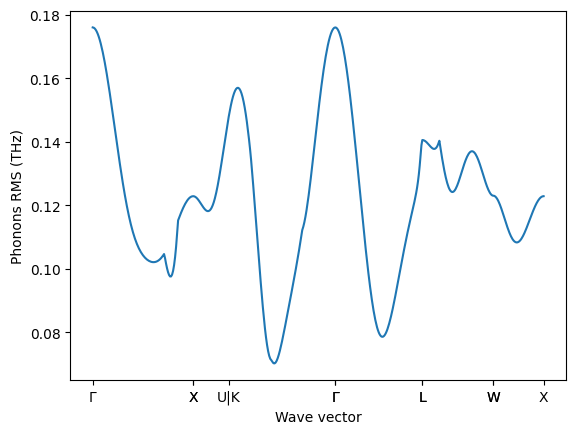

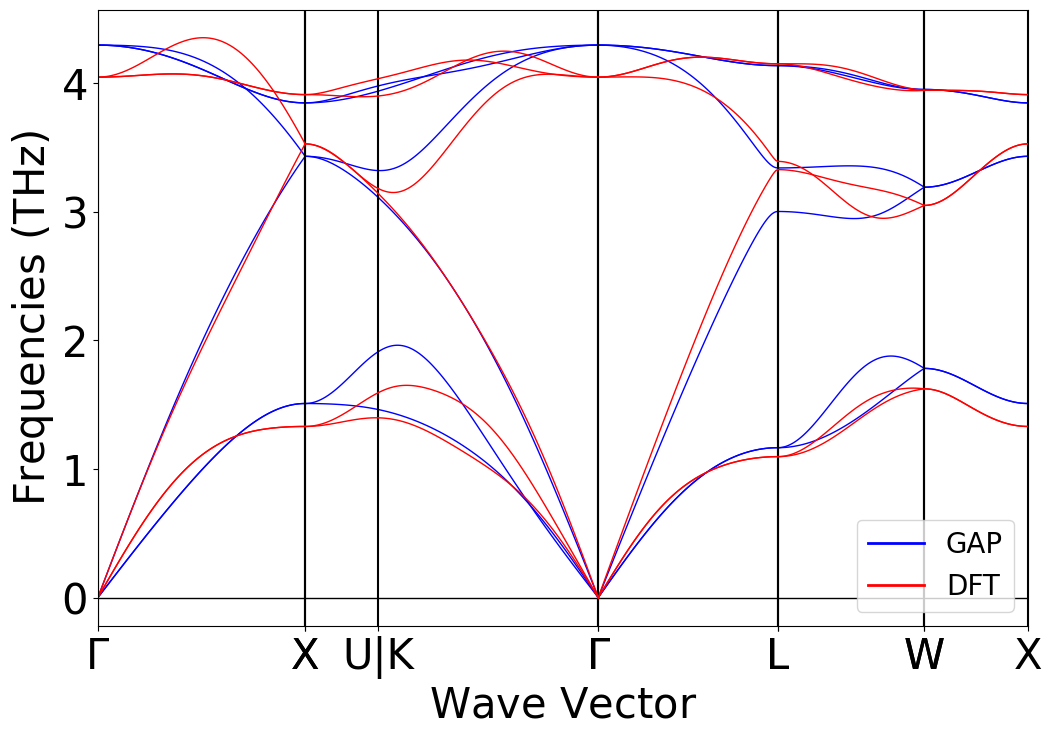

In [8]:
with mock_vasp(ref_paths=ref_paths, clean_folders=False) as mf:
    run_locally(
        autoplex_flow,
        create_folders=True,
        ensure_success=True,
        raise_immediately=True,
    )